# Data Mining: Performance Lavoratori

## Introduzione

Nel contesto lavorativo, non è sempre facile fare il proprio dovere con voglia e concentrazione.  
Da una parte, questo dipende dalla persona stessa, tuttavia anche dall'ambiente che lo circonda, da fattori esterni che, per quanto alcuni sono evidenti e altri no, in realtà possono risultare i principali motivi di per ottenere una buona produttività e performance da parte delle persone che ne fanno parte.  
Permettere ai dipendenti della propria azienda di vivere l'esperienza di lavoro molto più leggera, amichevole, flessibile e motivata permette a loro di ritornare progetti finiti di qualità

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#import warnings and repress warnings
#import warnings
#warnings.filterwarnings('ignore')

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Where to save figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#For saving me to rewrite it everytime
pscore = 'performance_score'

#5 pretty countplots
def countplots_5(df,feature):
    fig, ax = plt.subplots(1, 5, figsize=(20,6), sharey=True)
    for i, score in enumerate(sorted(df[pscore].unique())):
        sns.countplot(x=feature, hue=feature, data=df[df[pscore] == score], ax=ax[i])
        ax[i].set_title(f'Performance Score {score}')
        ax[i].tick_params(axis='x', rotation=45)

In [2]:
data = pd.read_csv(os.path.join(PROJECT_ROOT_DIR,"employees.csv"))
data.columns = map(str.lower,data.columns) #Column headers in lower case
data.head()

,employee_id,department,gender,age,job_title,hire_date,years_at_company,education_level,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


Non rilevanti al fine dell'analisi, non considero gli attributi di "employee_id" e "hire_date"

In [3]:
data.drop(columns=['employee_id','hire_date'],inplace=True)
df = data.copy() #For mantaining the original data
data.shape

(100000, 18)

## Data Cleaning

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   employee_id                  100000 non-null  int64  
 1   department                   100000 non-null  object 
 2   gender                       100000 non-null  object 
 3   age                          100000 non-null  int64  
 4   job_title                    100000 non-null  object 
 5   hire_date                    100000 non-null  object 
 6   years_at_company             100000 non-null  int64  
 7   education_level              100000 non-null  object 
 8   performance_score            100000 non-null  int64  
 9   monthly_salary               100000 non-null  float64
 10  work_hours_per_week          100000 non-null  int64  
 11  projects_handled             100000 non-null  int64  
 12  overtime_hours               100000 non-null  int64  
 13  

Sembra non ci siano valori nulli.

In [14]:
df.duplicated(subset=df).sum()

0

Non sono presenti duplicati. Per duplicati in base ai suoi subset, non è necessario controllare perchè non esistono nomi o valori univoci diversi dall'ID che possono generare disagio nell'analisi.

## Visualization

Nonostante può sembrare poco utile, ma nulla è scontato: vediamo se esiste una relazione tra il dipartimento e il performance score.

<Axes: xlabel='performance_score', ylabel='department'>

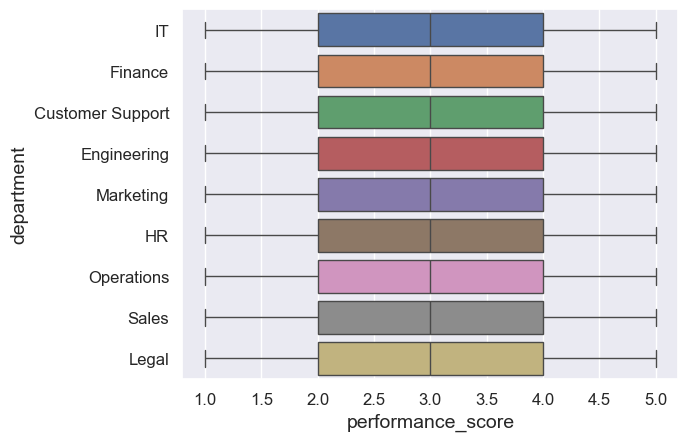

In [4]:
sns.boxplot(data=df,x=pscore,y='department',hue='department')

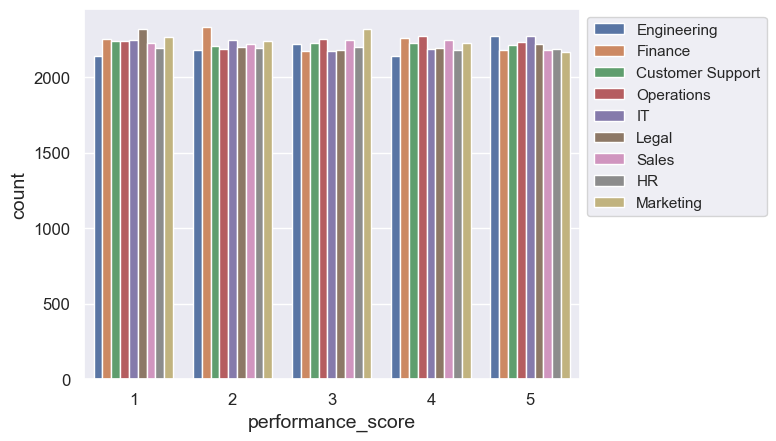

In [118]:
sns.countplot(df,x=pscore,hue='department')
plt.legend(bbox_to_anchor=(1,1))

C'è una buona distribuzione di ognuno.  
Ora vediamo il genere.

<Axes: xlabel='performance_score', ylabel='gender'>

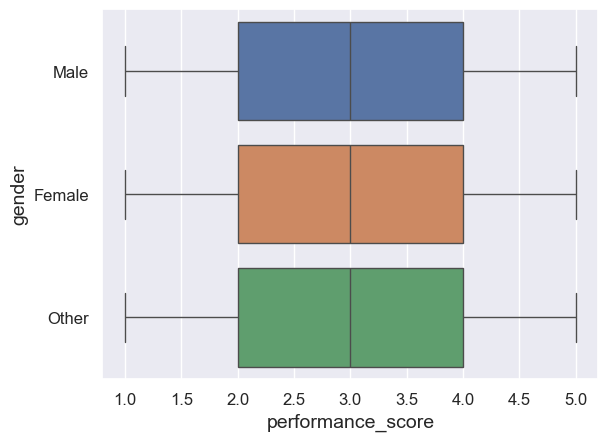

In [5]:
sns.boxplot(data=df,x=pscore,y='gender',hue='gender')

Anche qui è abbastanza distribuito.  
Visualizziamo l'età.

<Axes: xlabel='performance_score', ylabel='age_group'>

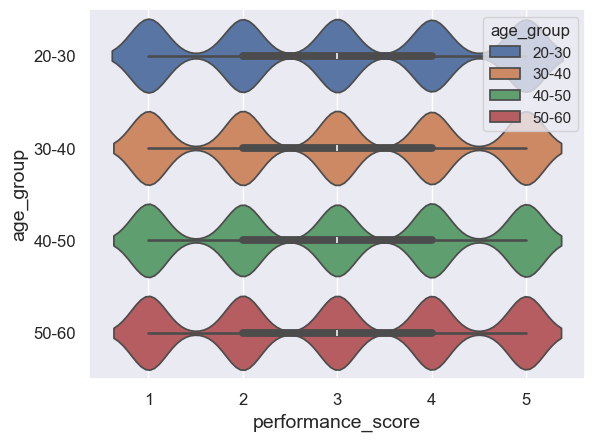

In [311]:
df['age_group']=pd.cut(df['age'],bins=[22,30,40,50,60],labels=['20-30','30-40','40-50','50-60'])
sns.violinplot(df, x=pscore,y='age_group',hue='age_group')

Il lavoro svolto.

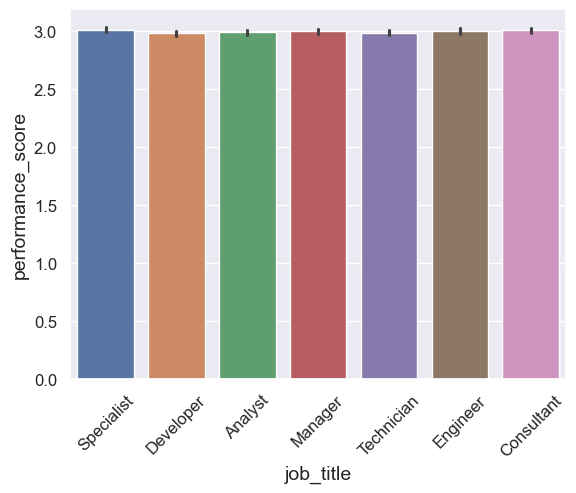

In [13]:
sns.barplot(df, x='job_title', y=pscore, hue='job_title')
plt.xticks(rotation=45)
plt.show()

Anni nell'azienda.

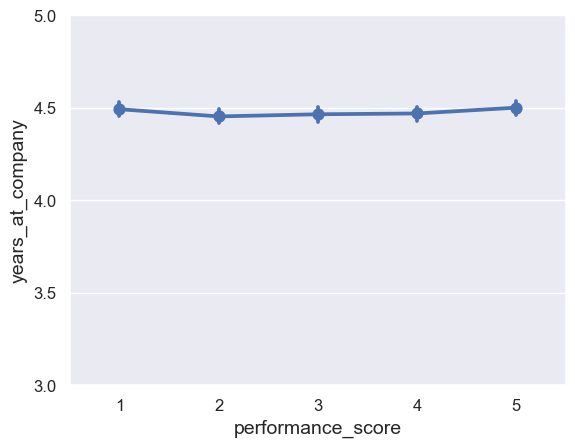

In [198]:
sns.pointplot(df, x=pscore, y='years_at_company')
plt.yticks([3,3.5,4,4.5,5])
plt.show()

Passiamo al livello di educazione.

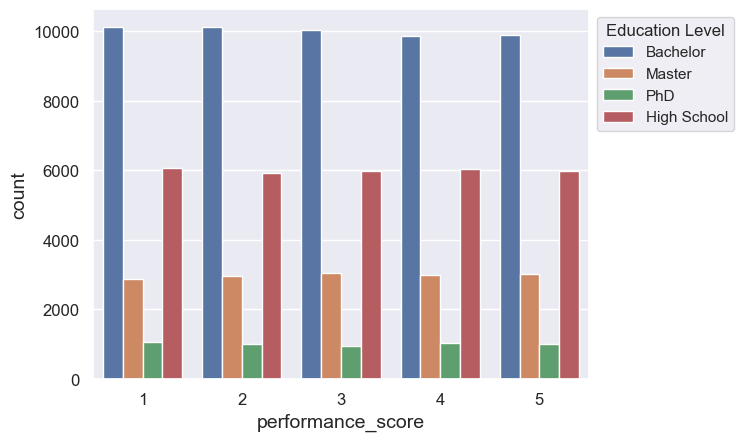

In [29]:
sns.countplot(df,x=pscore, hue='education_level')
plt.legend(title='Education Level', bbox_to_anchor=(1,1))

Il salario mensile.

<Axes: xlabel='performance_score', ylabel='monthly_salary'>

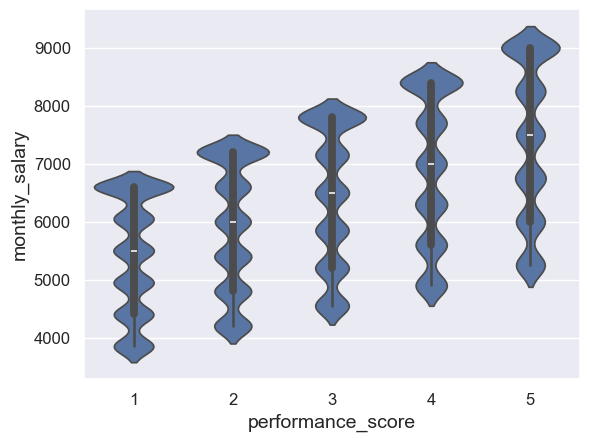

In [30]:
sns.violinplot(df,x=pscore,y='monthly_salary')

Sembra ci sia una correlazione lineare.

<Axes: xlabel='performance_score', ylabel='monthly_salary'>

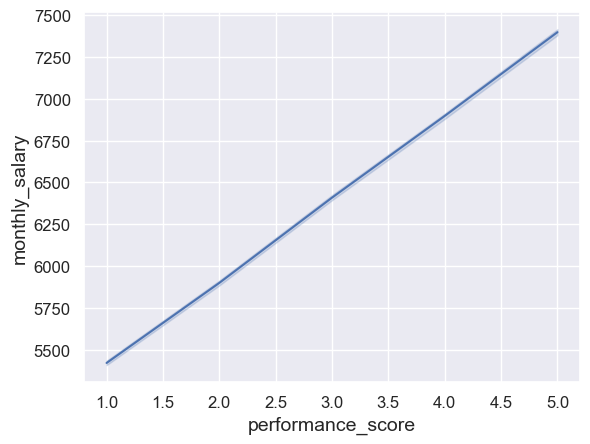

In [32]:
sns.lineplot(df,x=pscore,y='monthly_salary')

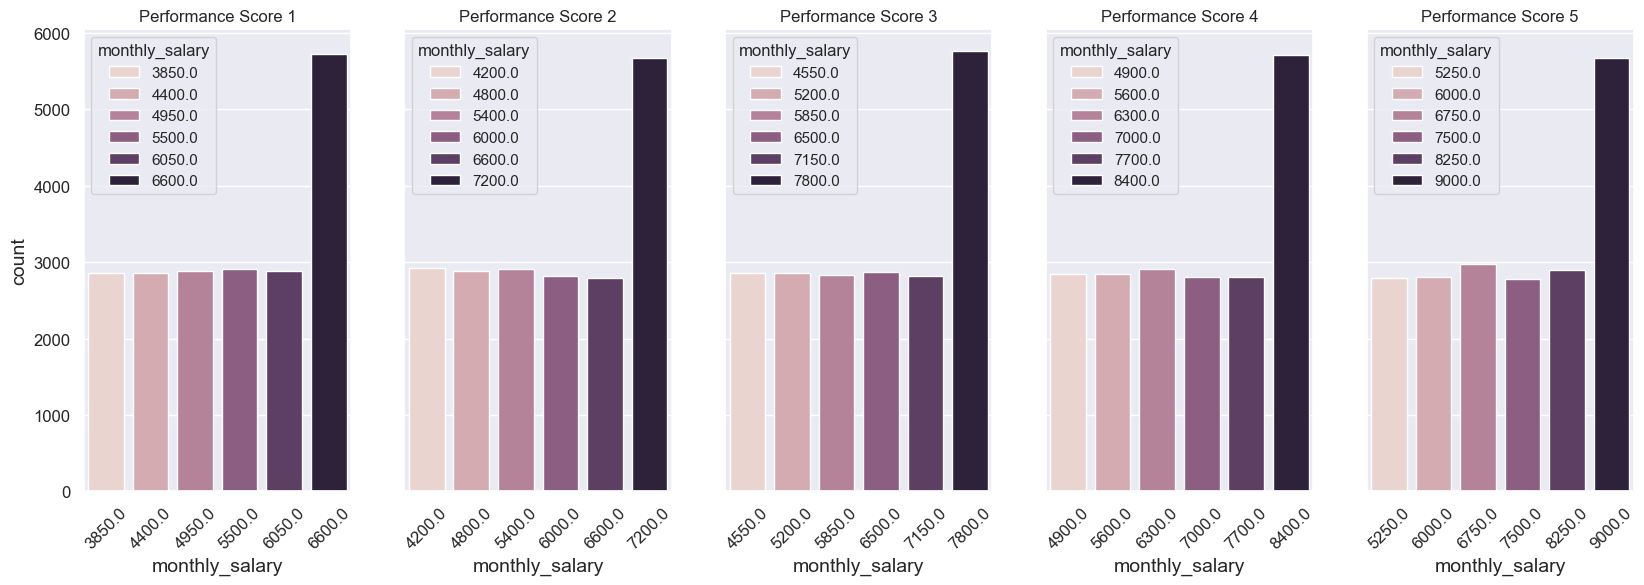

In [70]:
countplots_5(df,'monthly_salary')
plt.show()

<Axes: >

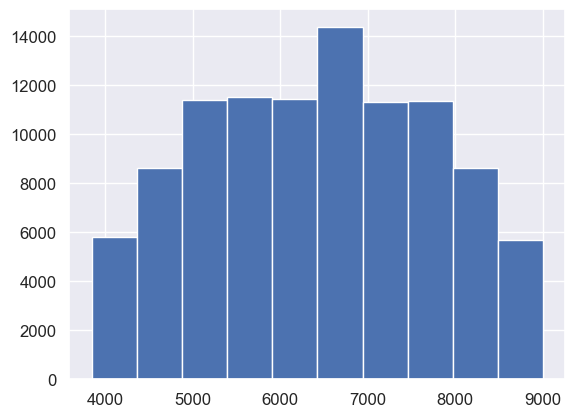

In [143]:
df['monthly_salary'].hist()

In [96]:
len(df['monthly_salary'].unique())

28

Si nota, come la performance di 5 non viene mai raggiunta da salari sotto i 5250, 1 non supera i 6600. Quindi tendenzialmente, più cresce il salario, e più aumenta la performance score.  
Proviamo a raggruppare le fascie di salari, in funzione ai grafici appena visionati, in modo tale da poter ottenere delle fascie utili a capire quale score porterebbero.

In [50]:
print(f'Min: {df['monthly_salary'].min()}, Max: {df['monthly_salary'].max()}')

Min: 3850.0, Max: 9000.0


<Axes: xlabel='performance_score', ylabel='count'>

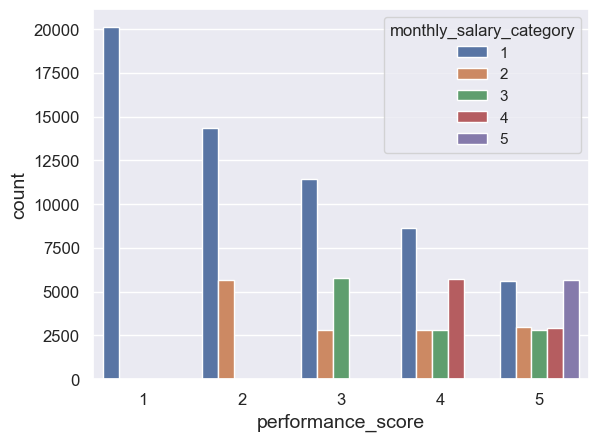

In [108]:
df['monthly_salary_category'] = pd.cut(df['monthly_salary'],bins=[3849.0,6600.0,7200.0,7800.0,8400.0,9001.0],labels=[1,2,3,4,5])
sns.countplot(df,x=pscore,hue='monthly_salary_category')

La fascia 5 (8400-9000) riesce a generare una performance pari al massimo, la fascia 4 (7800-8400) ottiene performance elevate ecc. Questo fa capire quanto un dipendente diventi produttivo in correlazione alla sua ricompensa mensile.  
Cosa succede se lo combiniamo con il ruolo svolto? Di seguito un plot che permette di visualizzare la combinazione di queste due feature: nell'asse x troviamo il ruolo svolto 

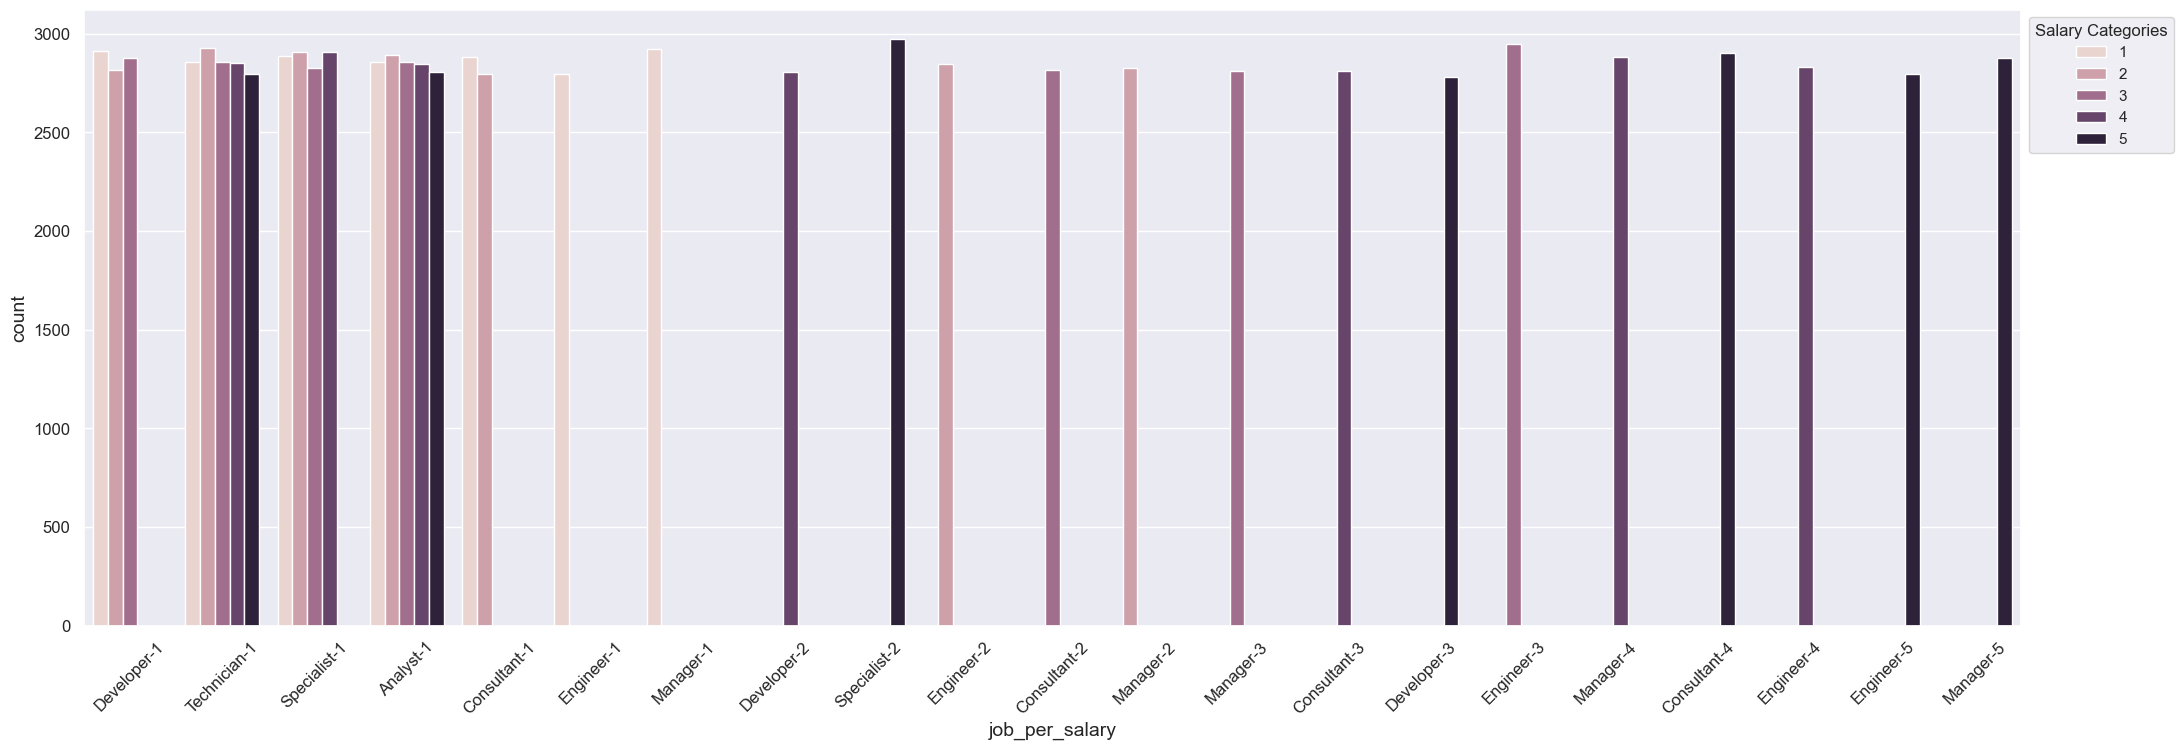

In [6]:
df['job_per_salary'] = df['job_title'] + '-' + df['monthly_salary_category'].astype(str)
plt.figure(figsize=(25,8))
sns.countplot(df.sort_values(by='monthly_salary_category'),x='job_per_salary',hue=pscore)
plt.xticks(rotation=45)
plt.legend(title='Salary Categories',bbox_to_anchor=(1,1))
plt.show()

Come si può intuire c'è una forte correlazione tra la combo ruolo-mensilità e la performance, soprattutto dall'ingegnere della fascia 1 di mensilità, dove si possono trovare solo combo che portano ad solo score di produttività.

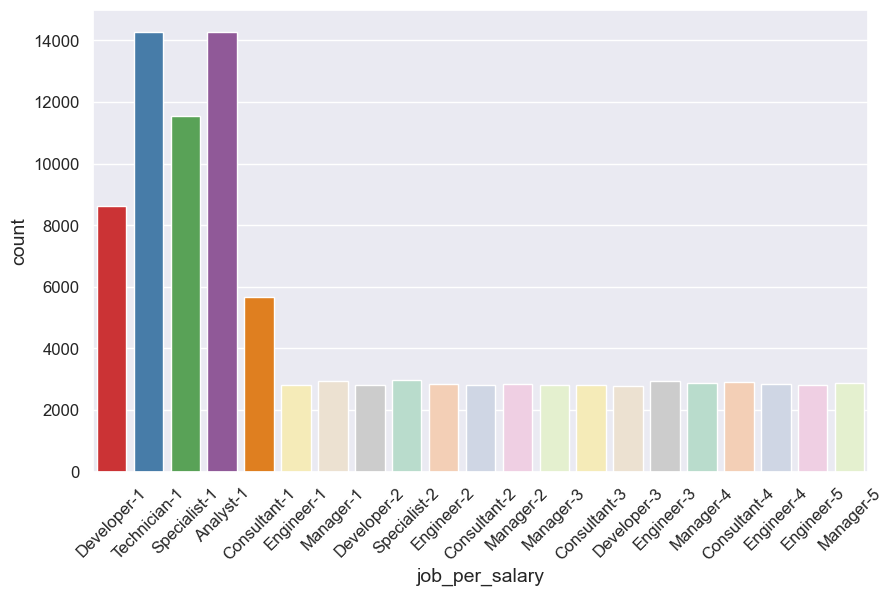

In [8]:
df_sorted = df.sort_values(by='monthly_salary_category')
most_ambiguouses = df_sorted['job_per_salary'].unique()[:5]
palette1 = sns.color_palette('Set1', n_colors=len(df_sorted['job_per_salary'].unique()))
palette2 = sns.color_palette('Pastel2', n_colors=len(df_sorted['job_per_salary'].unique()))
palette={x: palette1[i] if x in most_ambiguouses else palette2[i] for i,x in enumerate(df_sorted['job_per_salary'].unique())}
plt.figure(figsize=(10,6))
sns.countplot(df_sorted,x='job_per_salary',hue='job_per_salary',palette=palette)
plt.xticks(rotation=45)
plt.show()

In [12]:
df[df['job_per_salary'].isin(most_ambiguouses)].shape

(54367, 20)

Da come si vede dal plot e dal numero di record che fanno insieme, non sono irrilevanti i ruoli con le fasce di salario più "ambigui", quindi vanno tenuti in considerazione nell'analisi.
Hanno bisogno di un'altra scrematura per poter migliorare l'apprendimento, ma prima vediamo le altre feature cosa ci dicono: potrebbero essere utili!
Consideriamo le ore di lavoro settimanali.

<Axes: >

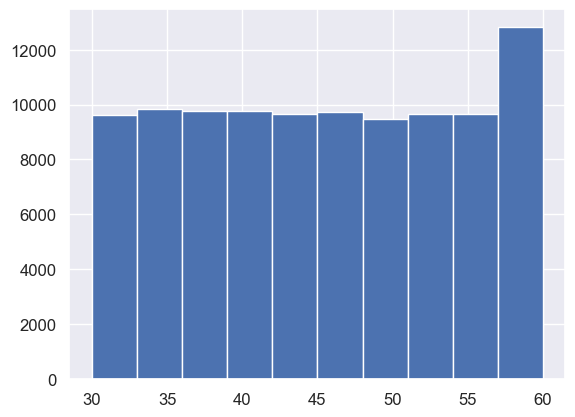

In [144]:
df['work_hours_per_week'].hist()

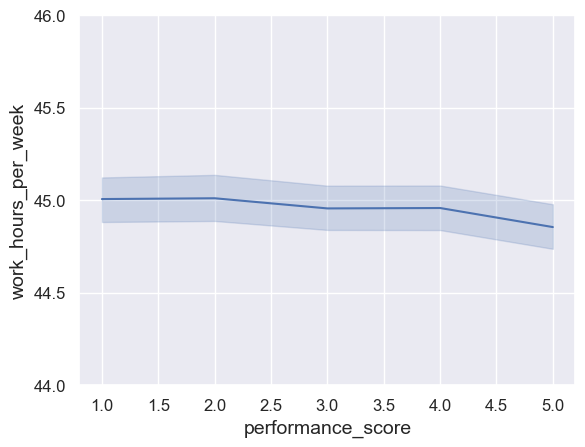

In [203]:
sns.lineplot(df,x=pscore, y='work_hours_per_week')
plt.yticks([44,44.5,45,45.5,46])
plt.show()

E' presente un piccolo calo. Proviamo di nuovo a verificare come prima in base a delle fasce di esse.

In [14]:
print(f'Min: {df['work_hours_per_week'].min()}, Max: {df['work_hours_per_week'].max()}')

Min: 30, Max: 60


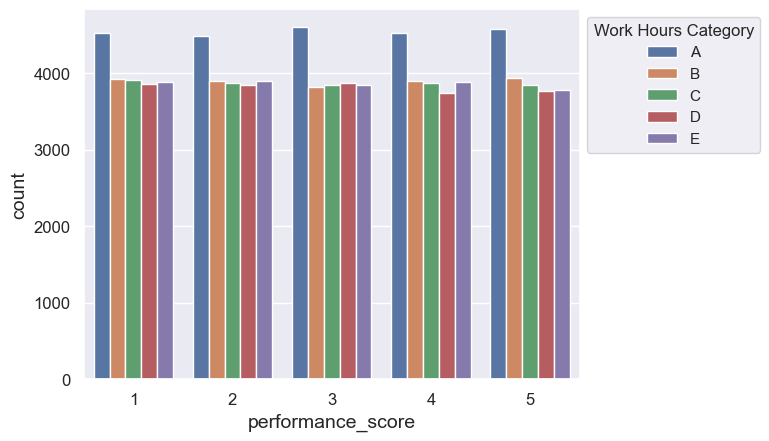

In [29]:
df['work_hours_category'] = pd.cut(df['work_hours_per_week'],bins=[29,36,42,48,54,61],labels=['A','B','C','D','E'])
sns.countplot(df,x=pscore,hue='work_hours_category')
plt.legend(title='Work Hours Category',bbox_to_anchor=(1,1))

Non sembra ci sia una grande correlazione presa singolarmente.  
Guardiamo quanti progetti sostenuti.

<Axes: xlabel='performance_score', ylabel='projects_handled'>

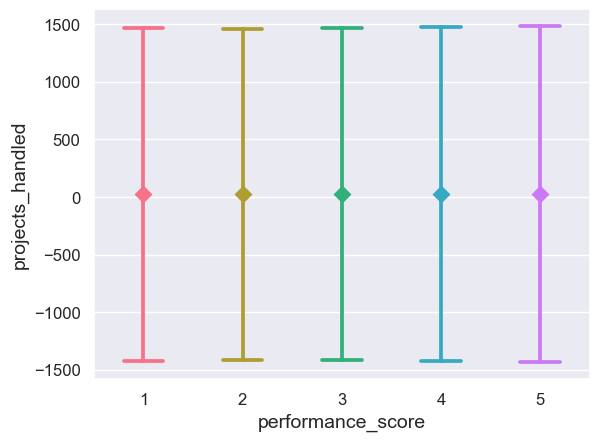

In [90]:
palette = sns.color_palette("husl", len(df[pscore].unique()))
sns.pointplot(
    df,x=pscore,y='projects_handled', hue=pscore,
    errorbar=("sd", 100),capsize=.4,
    color='red', linestyle='none',marker='D', palette=palette, legend=False
)

<Axes: >

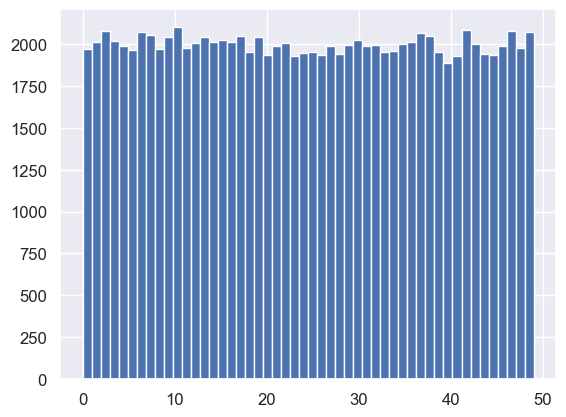

In [153]:
df['projects_handled'].hist(bins=50)

Vediamo gli straordinari sostenuti.

In [79]:
print(f'min: {df['overtime_hours'].min()}, max: {df['overtime_hours'].max()}')

min: 0, max: 29


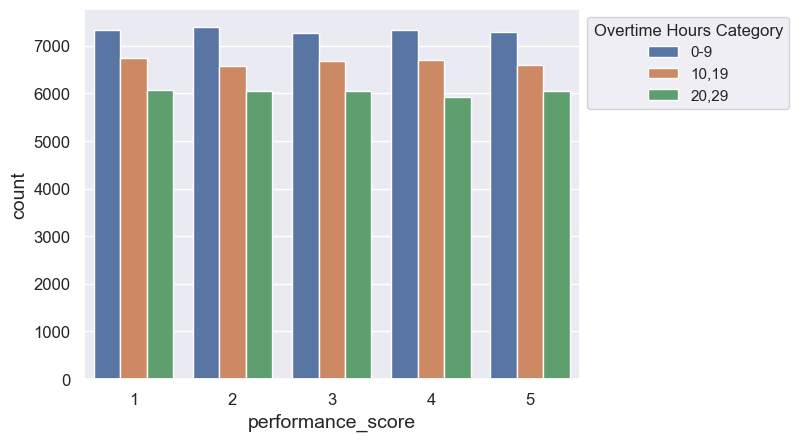

In [85]:
df['overtime_hours_category'] = pd.cut(df['overtime_hours'],bins=[-1,10,20,30],labels=['0-9','10,19','20,29'])
sns.countplot(df,x=pscore,hue='overtime_hours_category')
plt.legend(title='Overtime Hours Category',bbox_to_anchor=(1,1))

<Axes: >

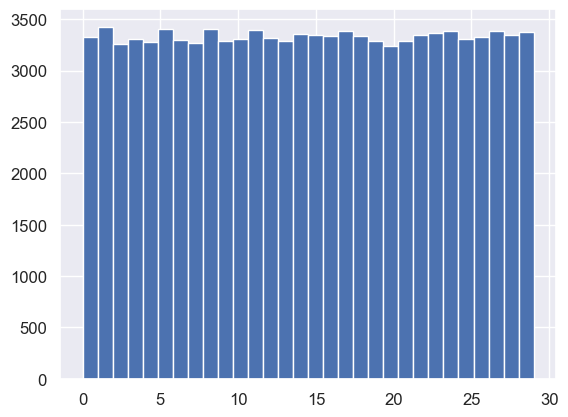

In [151]:
df['overtime_hours'].hist(bins=30)

<Axes: xlabel='performance_score', ylabel='overtime_hours'>

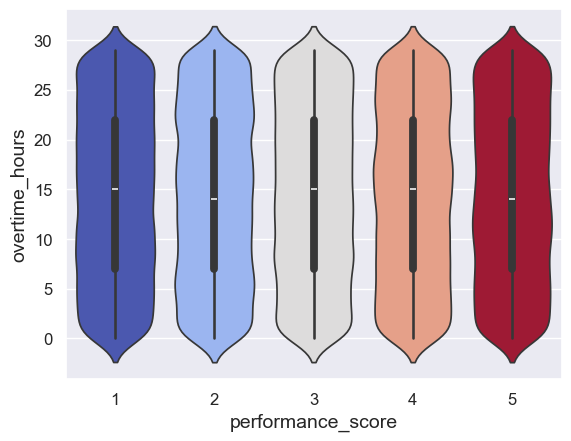

In [134]:
sns.violinplot(df,x=pscore,y='overtime_hours',hue=pscore,legend=False,palette='coolwarm')

Giorni di malattia

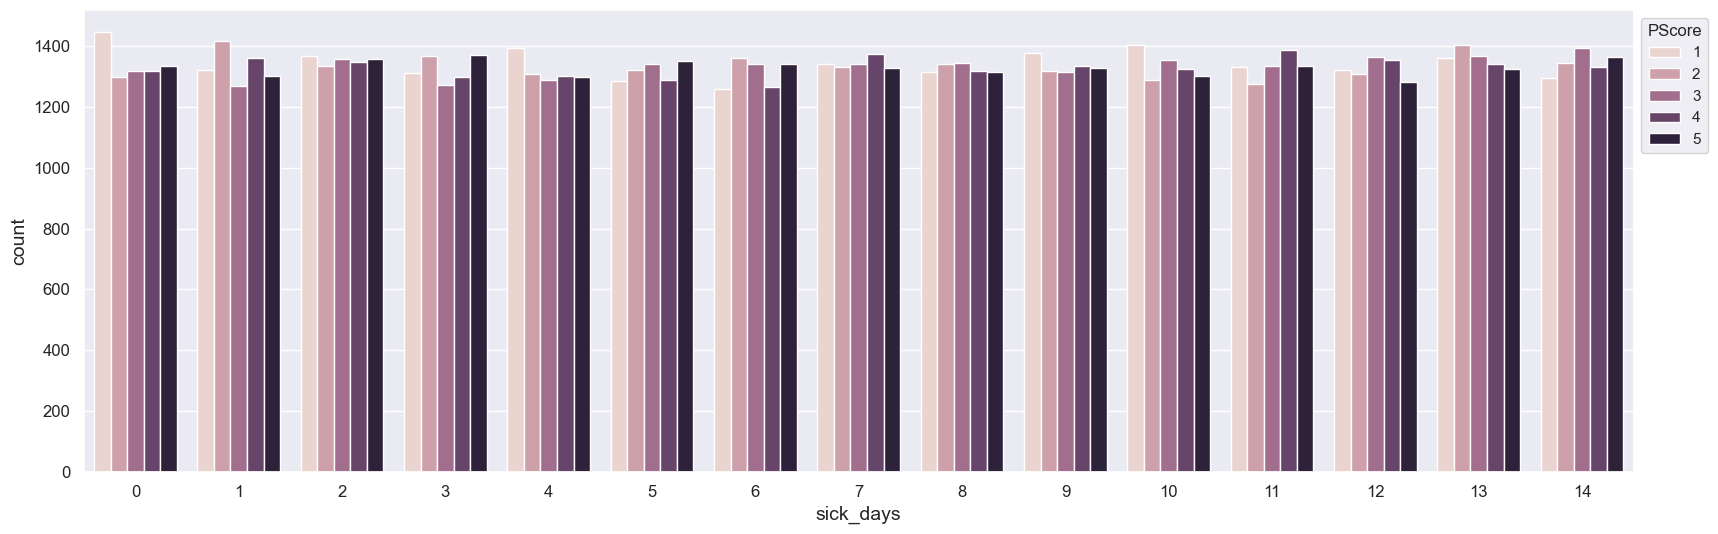

In [99]:
plt.figure(figsize=(20,6))
sns.countplot(df,x='sick_days',hue=pscore)
plt.legend(title='PScore',bbox_to_anchor=(1,1))

<Axes: >

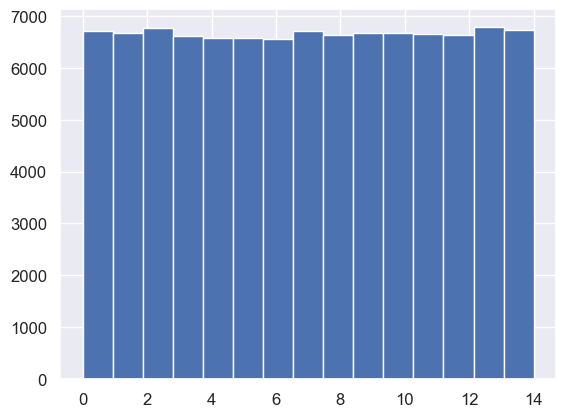

In [162]:
df['sick_days'].hist(bins=len(df.sick_days.unique()))

Frequenza di smart-working

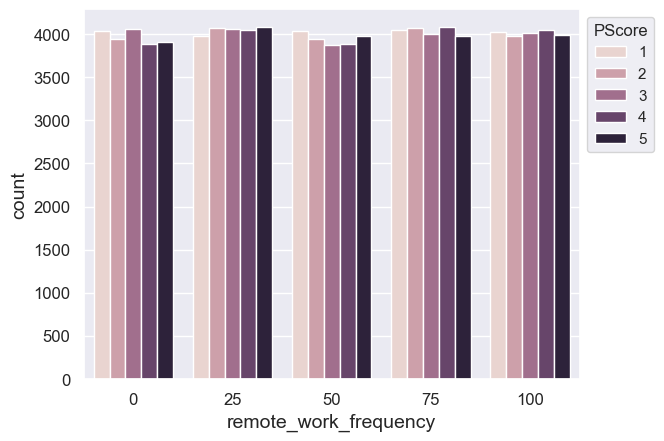

In [101]:
sns.countplot(df,x='remote_work_frequency',hue=pscore)
plt.legend(title='PScore',bbox_to_anchor=(1,1))

Dimensione del team

<Axes: xlabel='performance_score', ylabel='team_size'>

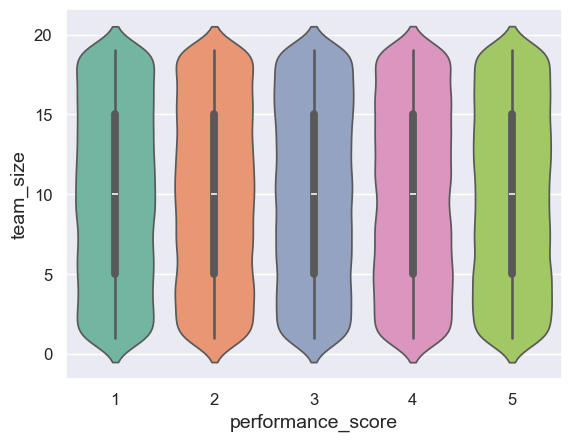

In [124]:
sns.violinplot(df,x=pscore,y='team_size',hue=pscore,legend=False,palette='Set2')

Ore di training

<Axes: xlabel='performance_score', ylabel='training_hours'>

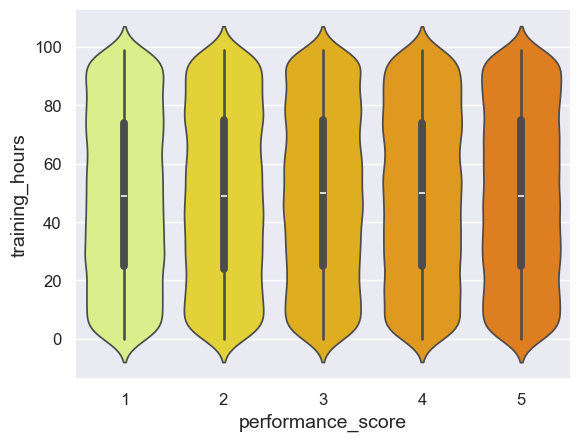

In [129]:
sns.violinplot(df,x=pscore,y='training_hours',hue=pscore,legend=False,palette='Wistia')

Numero di promozioni

<Axes: xlabel='performance_score', ylabel='count'>

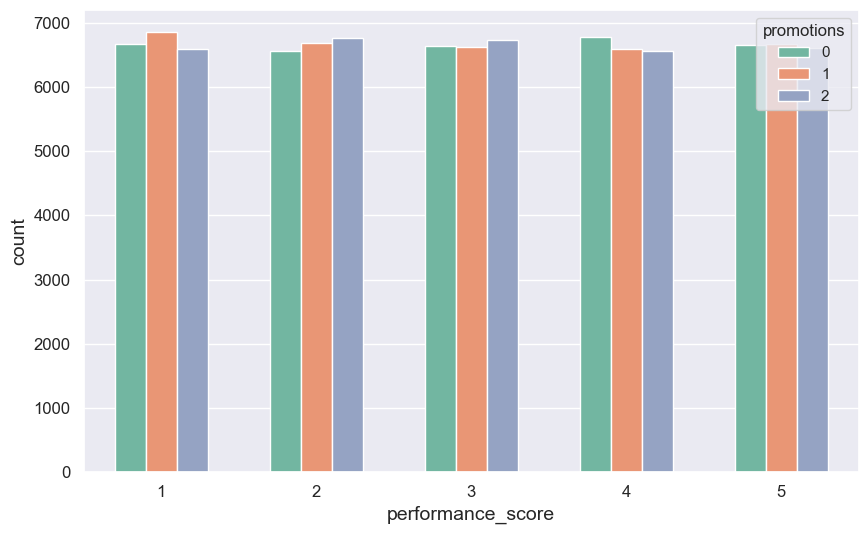

In [146]:
plt.figure(figsize=(10,6))
sns.countplot(df,x=pscore,hue='promotions',palette='Set2',width=0.6)

Satisfaction score

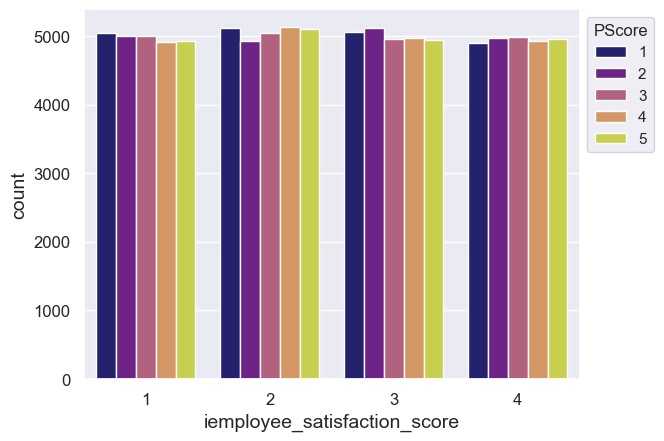

In [10]:
df['iemployee_satisfaction_score'] = pd.cut(df['employee_satisfaction_score'],bins=[0,2,3,4,6], labels=[1,2,3,4])
sns.countplot(df,x='iemployee_satisfaction_score',hue=pscore,palette='plasma',saturation=0.6)
plt.legend(title='PScore',bbox_to_anchor=(1,1))

<Axes: xlabel='performance_score', ylabel='employee_satisfaction_score'>

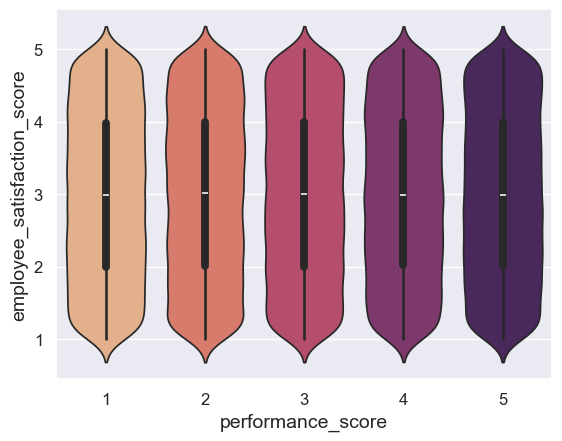

In [176]:
sns.violinplot(df,x=pscore,y='employee_satisfaction_score',hue=pscore,palette='flare',legend=False, saturation=0.8)

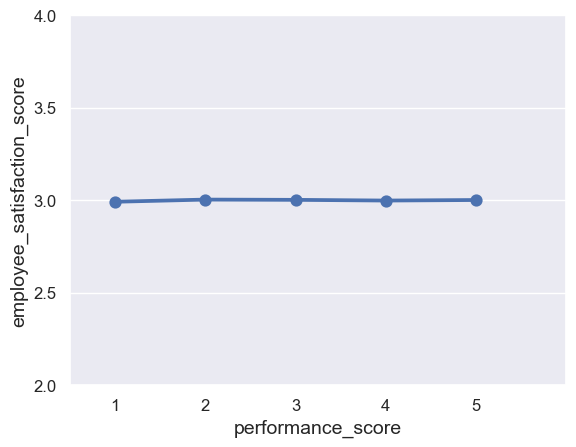

In [28]:
sns.pointplot(df,x=pscore,y='employee_satisfaction_score')
plt.xticks([0,1,2,3,4,5])
plt.yticks([2,2.5,3,3.5,4])
plt.show()

Si è dimesso

<Axes: xlabel='resigned', ylabel='count'>

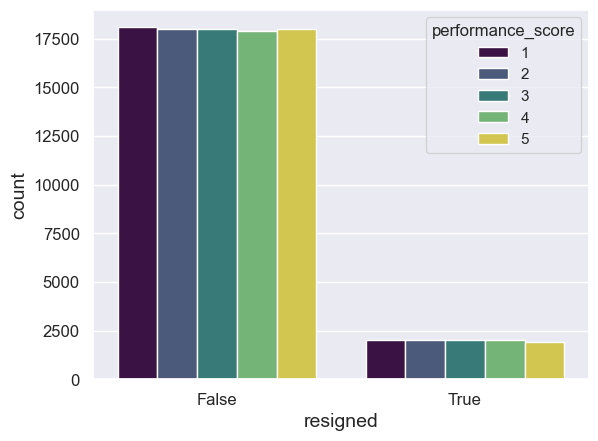

In [196]:
sns.countplot(df,x='resigned',hue=pscore,palette='viridis',saturation=0.6)

Si nota come molte variabili singolarmente sono uniformi nella correlazione con il performance score. A questo punto si può considerare di combinare i vari attributi, considerando il contesto nel quale ci troviamo. 
Proviamo a combinare satisfaction e ambigui.

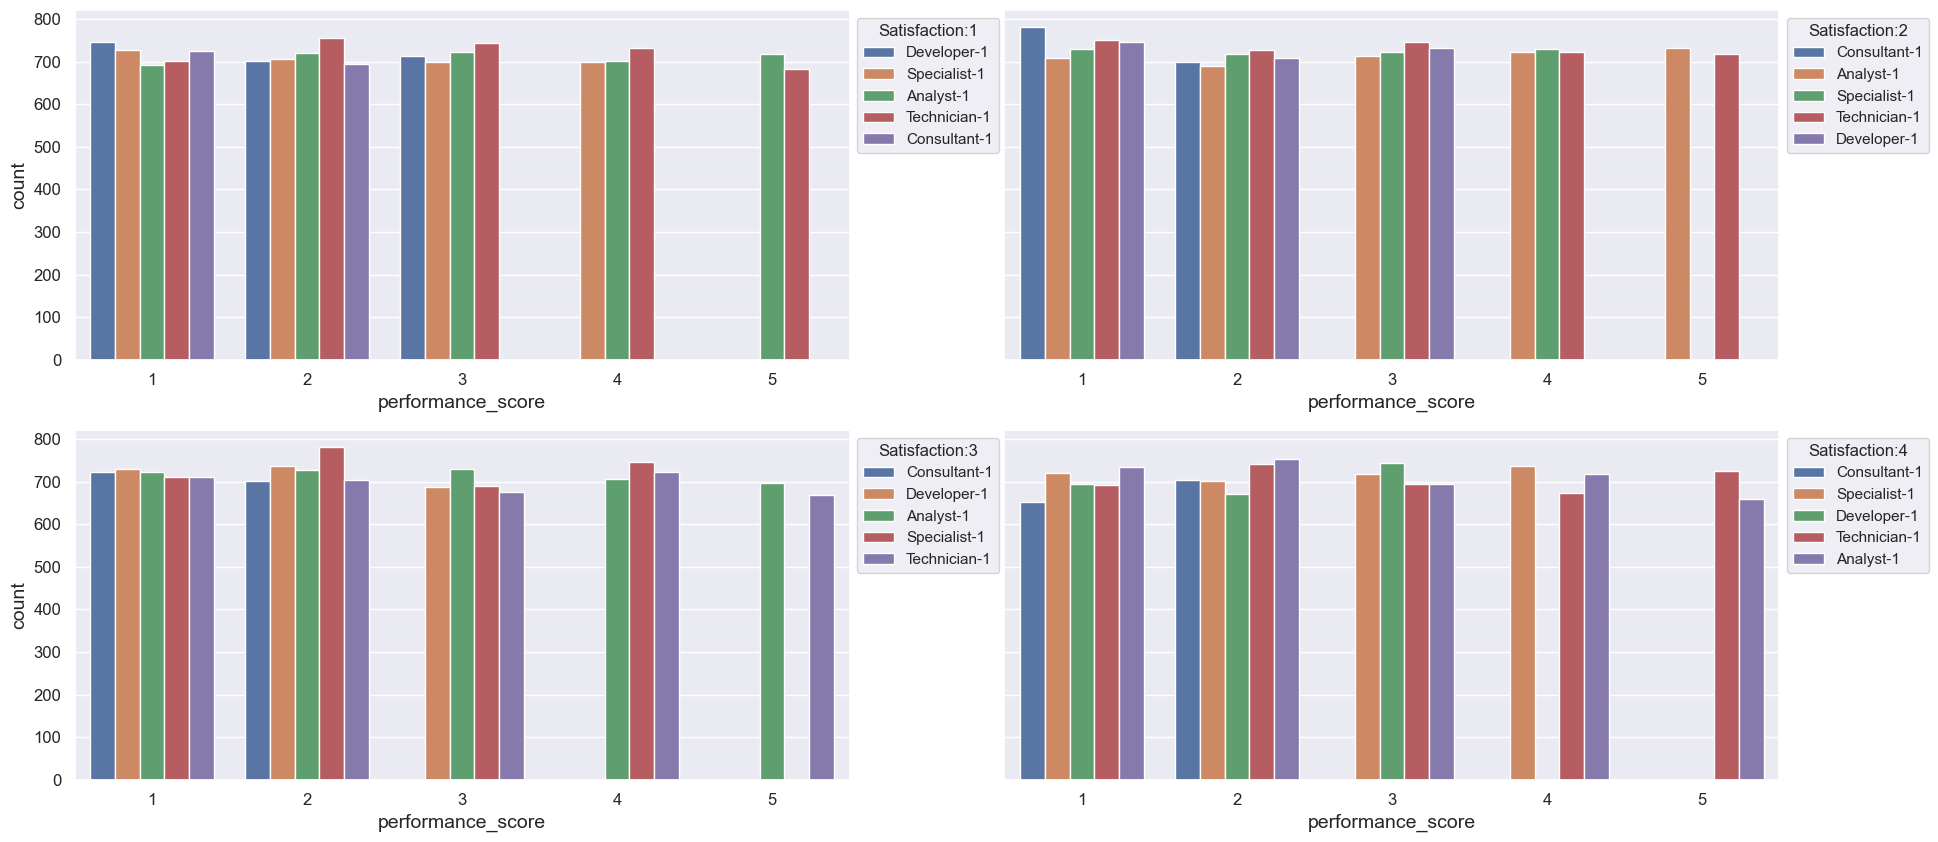

In [12]:
dfma = df[df['job_per_salary'].isin(most_ambiguouses)].copy()
f, ax = plt.subplots(2,2,figsize=(22,10),sharey=True)
ax = ax.flatten()
for i,x in enumerate(sorted(dfma['iemployee_satisfaction_score'].unique())):
    sns.countplot(dfma[dfma['iemployee_satisfaction_score']==x],x=pscore,hue='job_per_salary',ax=ax[i])
    ax[i].legend(title='Satisfaction:'+str(x),bbox_to_anchor=(1,1))

Fascia di salario mensile  e satisfaction score

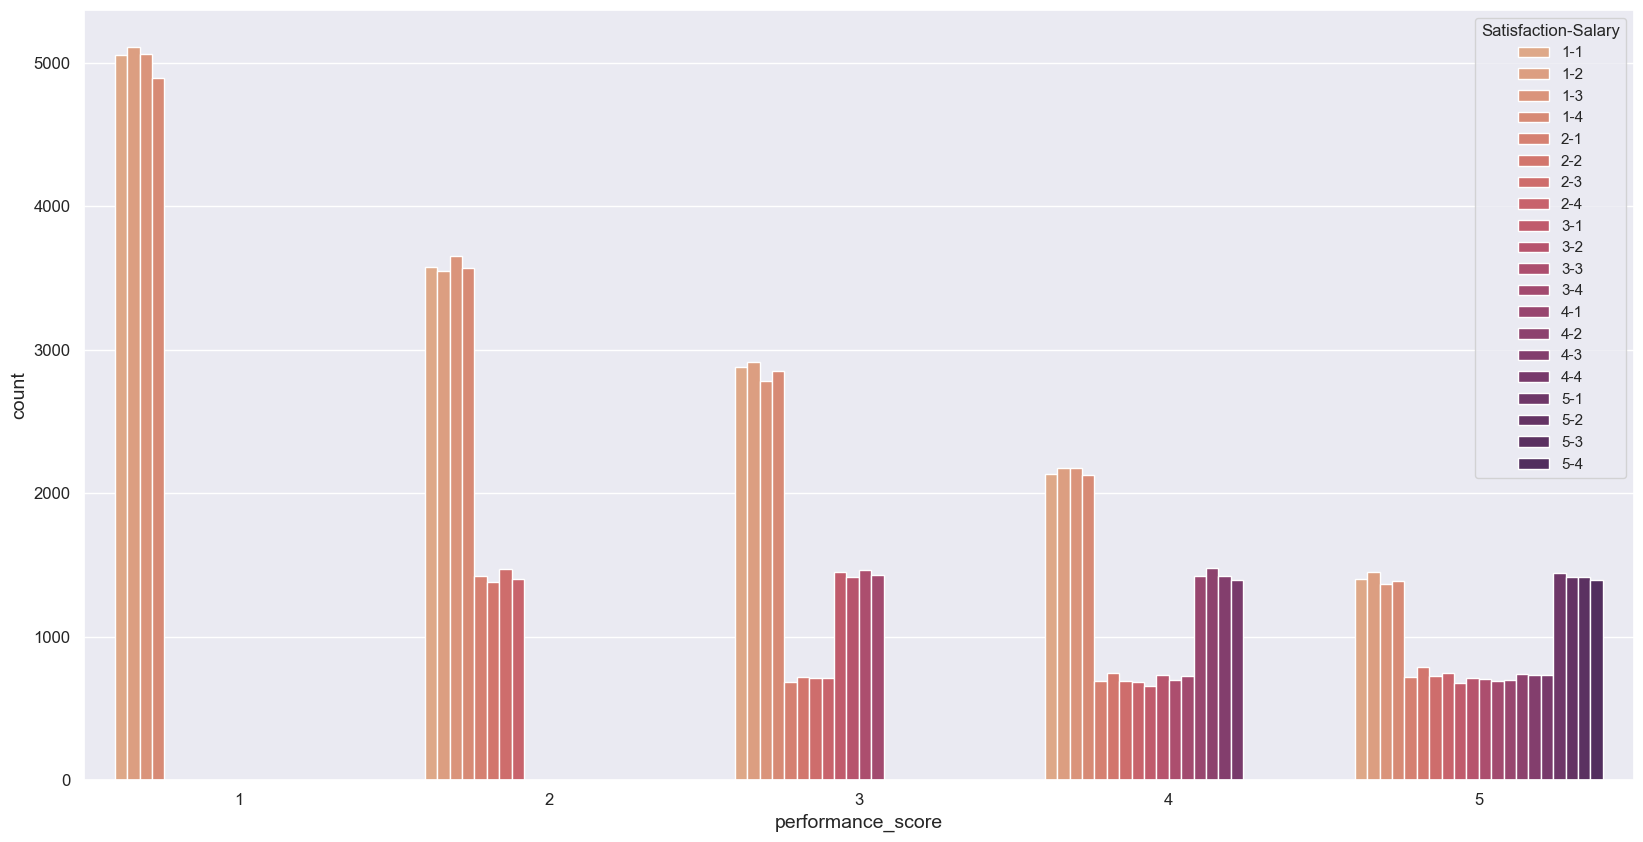

In [24]:
df['satisalary'] = df['monthly_salary_category'].astype(str) +'-'+ df['iemployee_satisfaction_score'].astype(str)
plt.figure(figsize=(20,10))
sns.countplot(df.sort_values(by=['monthly_salary_category','iemployee_satisfaction_score']),x=pscore,hue='satisalary',palette='flare')
plt.legend(title='Satisfaction-Salary',bbox_to_anchor=(1,1))

Ha lo stesso andamento rispetto a quello del salario mensile preso singolarmente (come fascia sempre).  
Satisfaction e salari ambigui

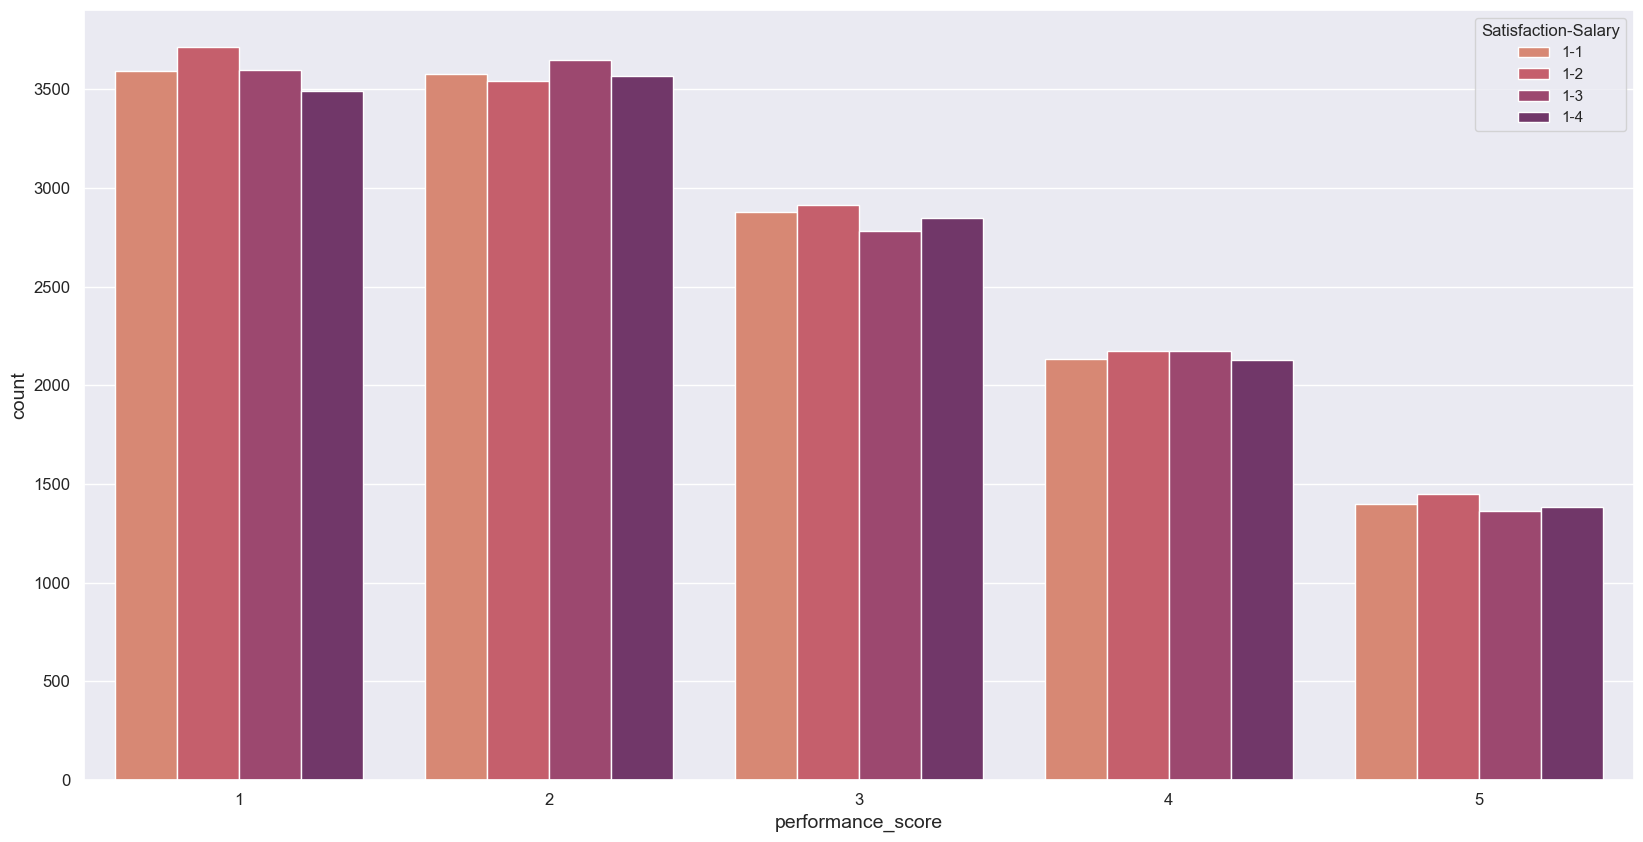

In [25]:
dfma['satisalary'] = dfma['monthly_salary_category'].astype(str) +'-'+ dfma['iemployee_satisfaction_score'].astype(str)
plt.figure(figsize=(20,10))
sns.countplot(dfma.sort_values(by=['monthly_salary_category','iemployee_satisfaction_score']),x=pscore,hue='satisalary',palette='flare')
plt.legend(title='Satisfaction-Salary',bbox_to_anchor=(1,1))

Satisfaction e lavoro-salario ambigui.

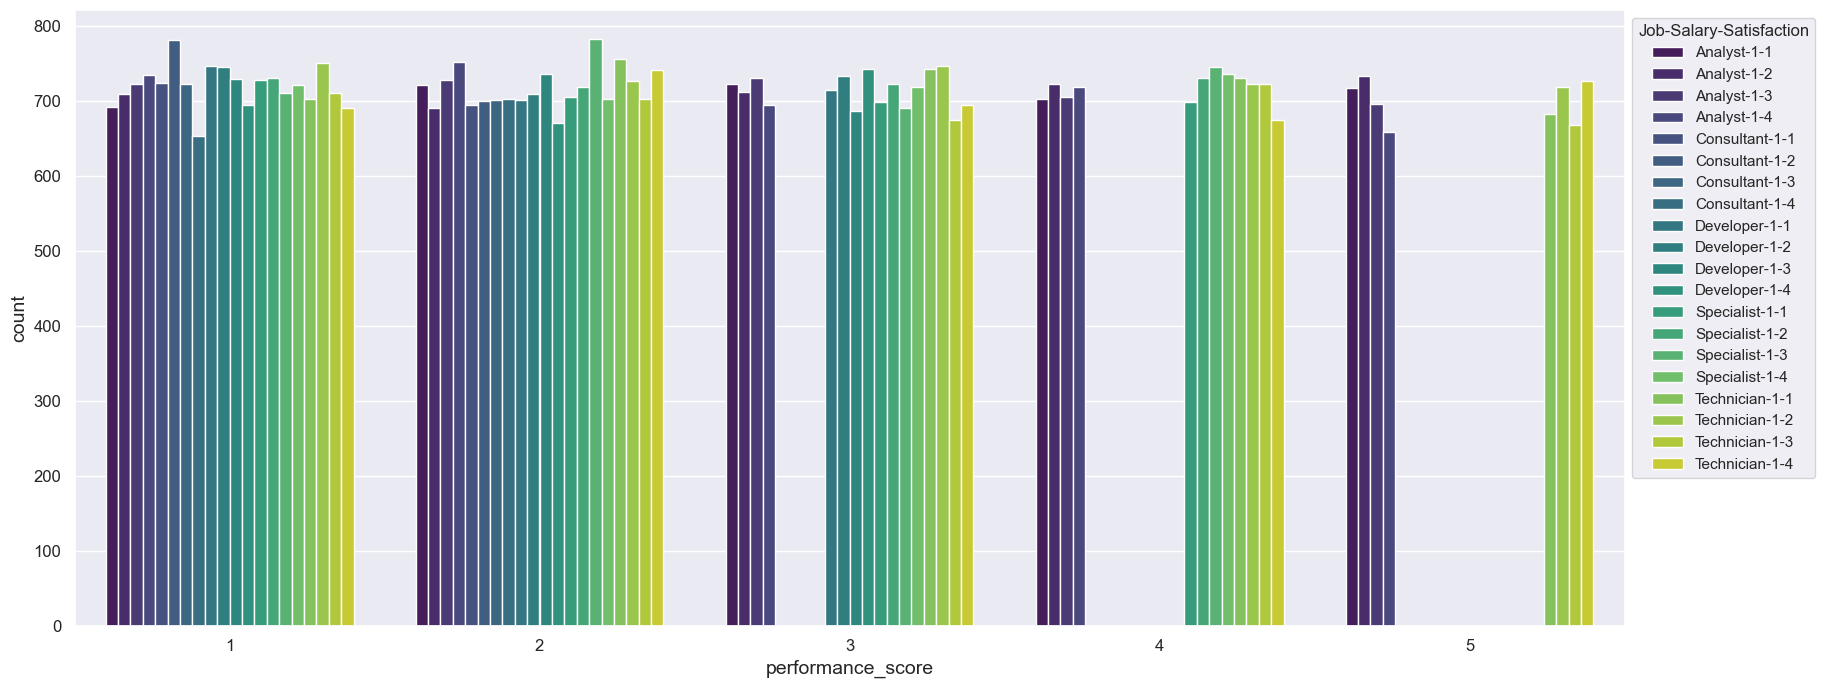

In [36]:
dfma['job_salary_satisfaction'] = dfma['job_per_salary'].astype(str) +'-'+ dfma['iemployee_satisfaction_score'].astype(str)
plt.figure(figsize=(20,8))
sns.countplot(dfma.sort_values(by=['job_per_salary','iemployee_satisfaction_score']),x=pscore,hue='job_salary_satisfaction',palette='viridis')
plt.legend(title='Job-Salary-Satisfaction',bbox_to_anchor=(1,1))

Dimensione Team e lavoro-salari ambigui

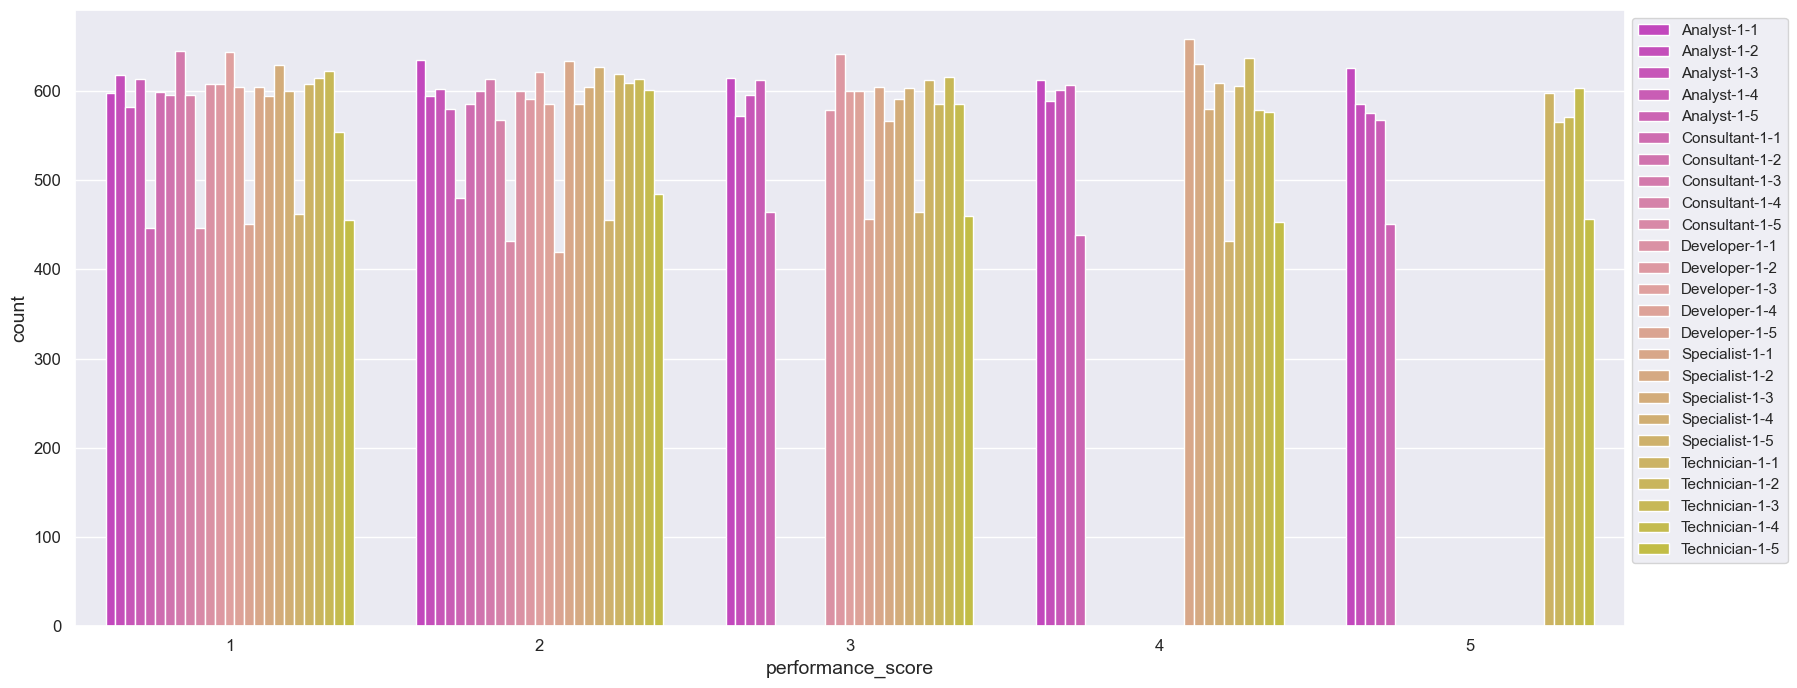

In [63]:
dfma['team_size_category'] = pd.cut(df['team_size'],bins=[0,4,8,12,16,21],labels=[1,2,3,4,5])
dfma['job_salary_team_size'] = dfma['job_per_salary'].astype(str) +'-'+ dfma['team_size_category'].astype(str)
plt.figure(figsize=(20,8))
sns.countplot(dfma.sort_values(by=['job_per_salary','team_size_category']),x=pscore,hue='job_salary_team_size',palette='spring',saturation=0.5)
plt.legend(bbox_to_anchor=(1,1))

Dimensione Team e education level ambigui

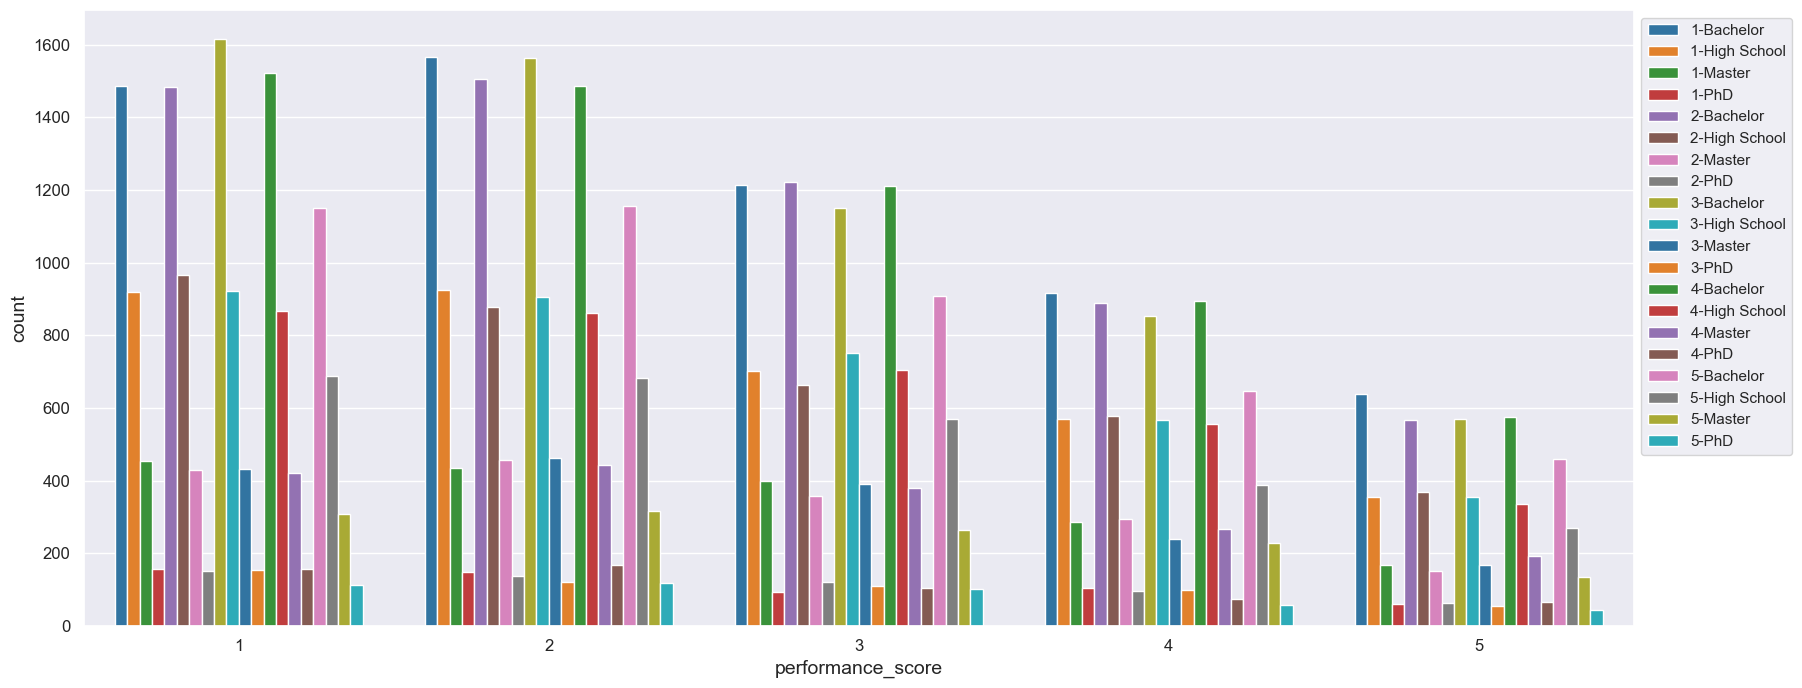

In [57]:
dfma['team_education'] = dfma['team_size_category'].astype(str) +'-'+ dfma['education_level'].astype(str)
plt.figure(figsize=(20,8))
sns.countplot(dfma.sort_values(by=['team_size_category','education_level']),x=pscore,hue='team_education',palette='tab10')
plt.legend(bbox_to_anchor=(1,1))

Anni nell'azienda e lavoro-salario ambigui.

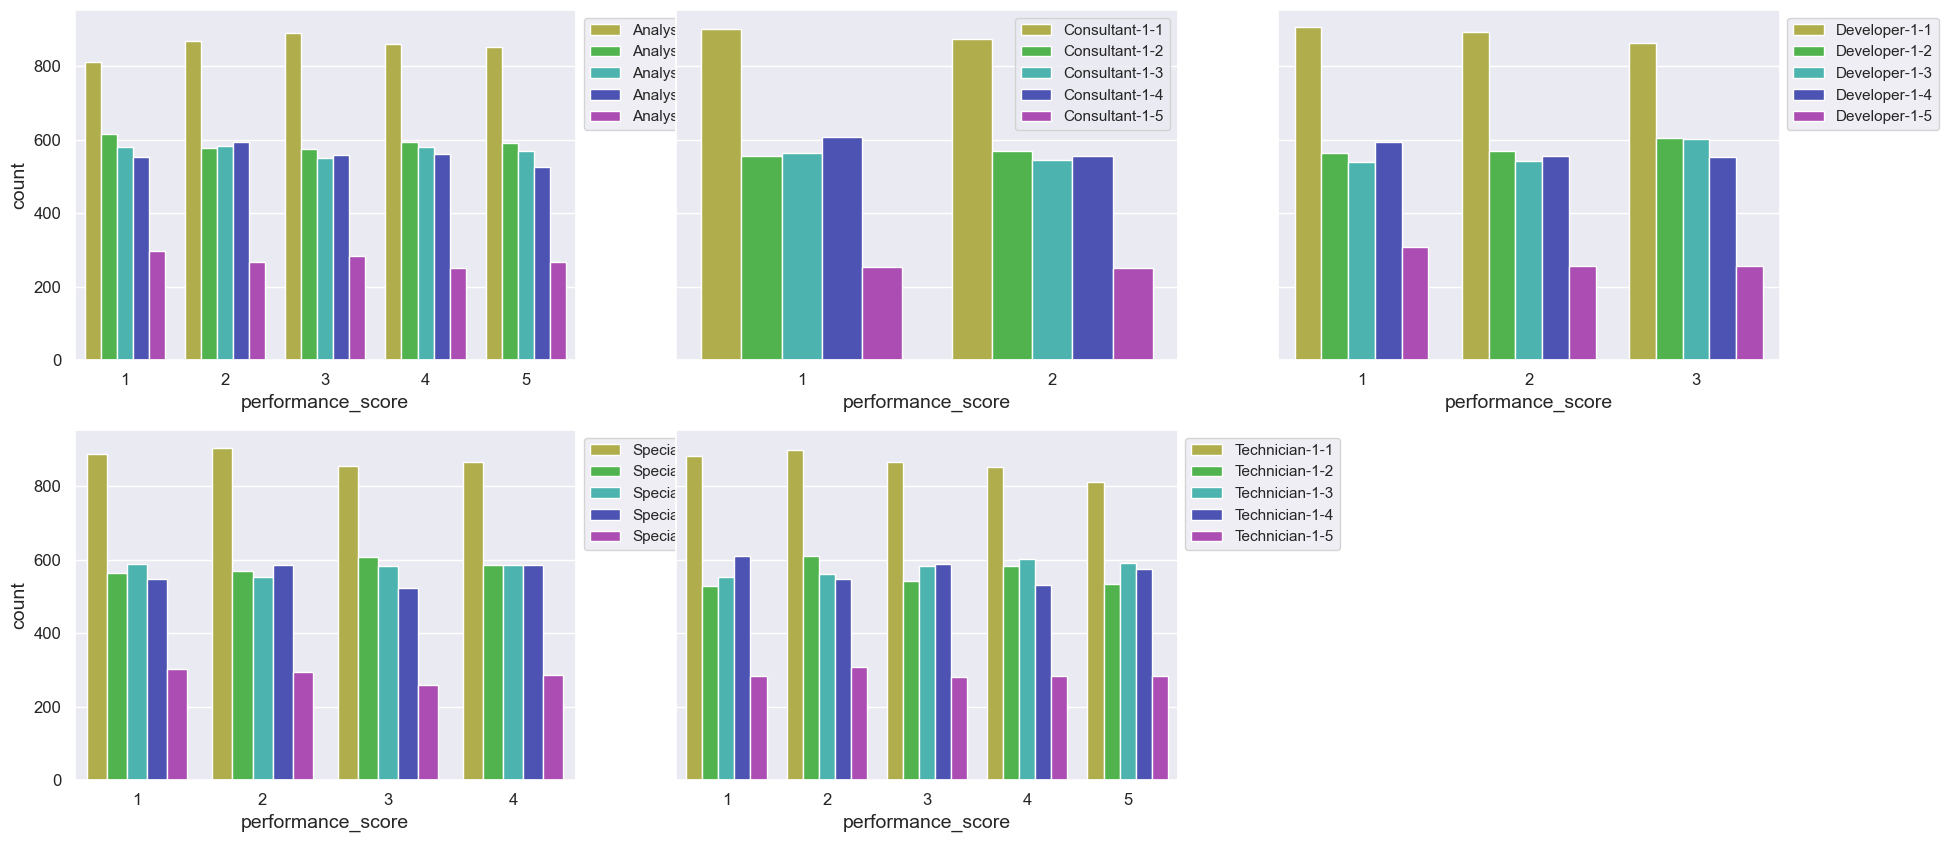

In [103]:
dfma['years_at_company_category'] = pd.cut(df['years_at_company'],bins=[-1,2,4,6,8,11],labels=[1,2,3,4,5])
dfma['job_salary_years'] = dfma['job_per_salary'].astype(str) +'-'+ dfma['years_at_company_category'].astype(str)
f,ax = plt.subplots(2,3,figsize=(22,10),sharey=True)
ax = ax.flatten()
for i,job_salary in enumerate(sorted(dfma['job_per_salary'].unique())):
    sns.countplot(dfma[dfma['job_per_salary']==job_salary].sort_values(by=['job_per_salary','years_at_company_category']),x=pscore,hue='job_salary_years',palette='hsv',saturation=0.4,ax=ax[i])
    ax[i].legend(bbox_to_anchor=(1,1))
ax[5].set_visible(False)

Lavoro da remoto e lavoro-salario ambigui.

In [92]:
sorted(dfma['remote_work_frequency'].unique())

[0, 25, 50, 75, 100]

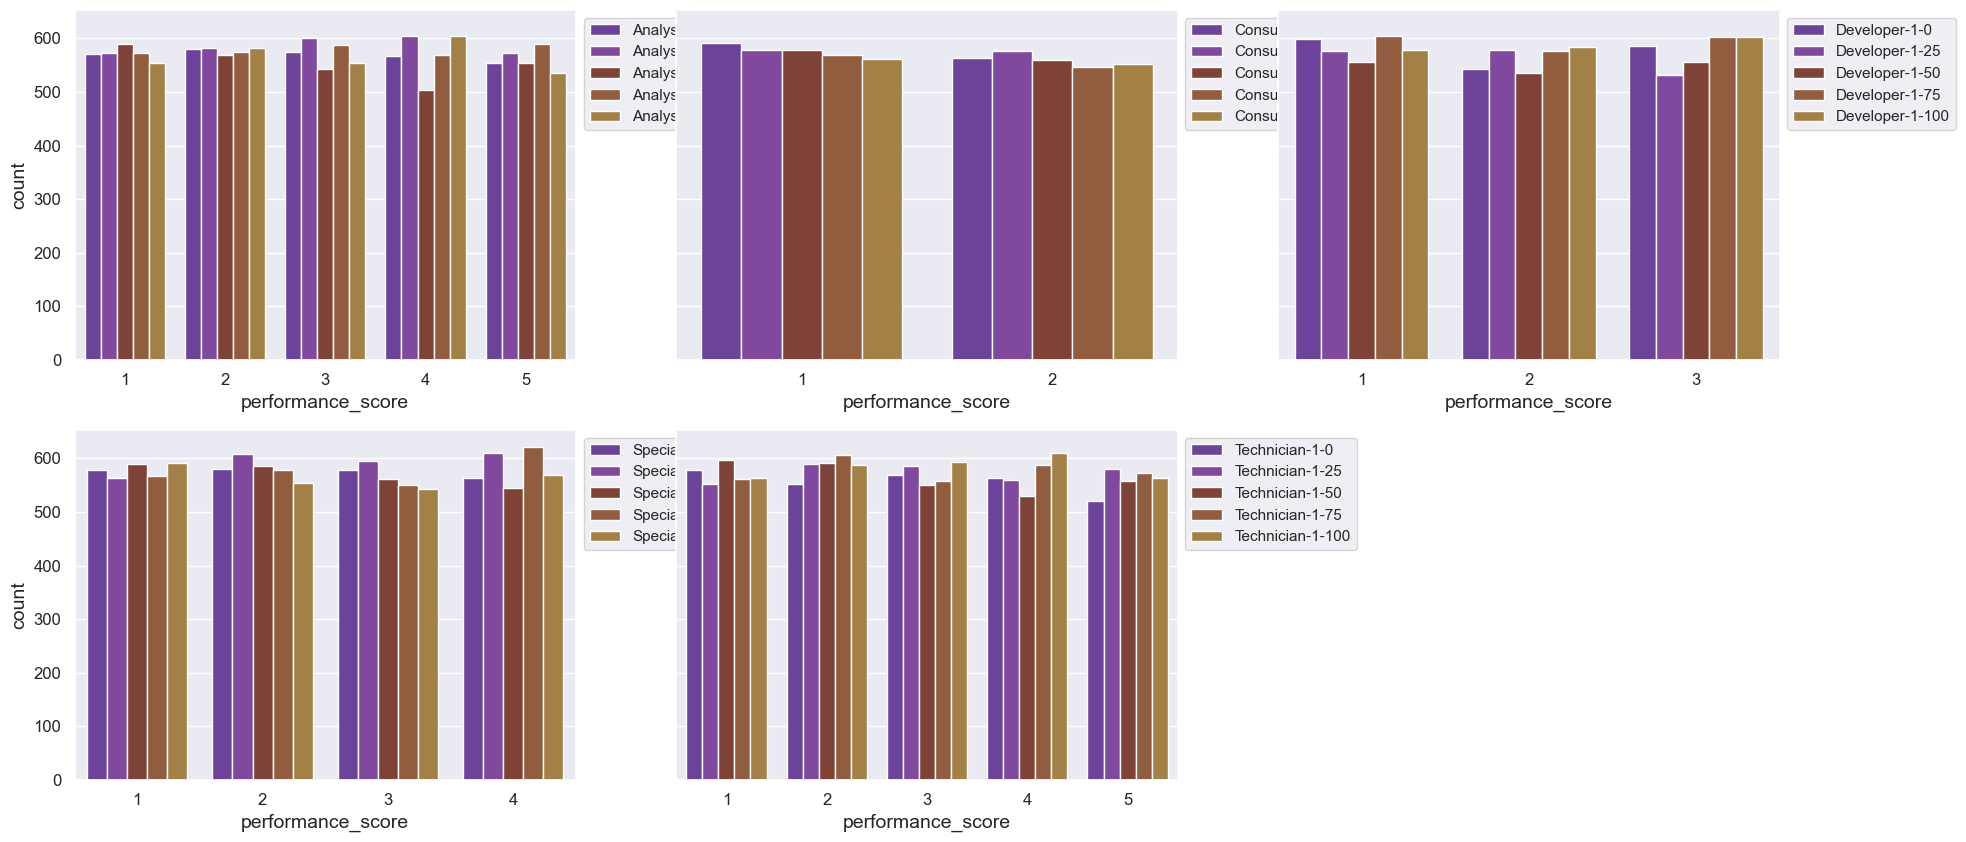

In [94]:
dfma['job_salary_remote'] = dfma['job_per_salary'].astype(str) +'-'+ dfma['remote_work_frequency'].astype(str)
f,ax = plt.subplots(2,3,figsize=(22,10),sharey=True)
ax = ax.flatten()
for i,job_salary in enumerate(sorted(dfma['job_per_salary'].unique())):
    sns.countplot(dfma[dfma['job_per_salary']==job_salary].sort_values(by=['job_per_salary','remote_work_frequency']),x=pscore,hue='job_salary_remote',palette='gnuplot',saturation=0.4,ax=ax[i])
    ax[i].legend(bbox_to_anchor=(1,1))
ax[5].set_visible(False)

Ore di straordinari e lavoro-salario ambigui.

In [101]:
dfma.sort_values(by='overtime_hours')['overtime_hours'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

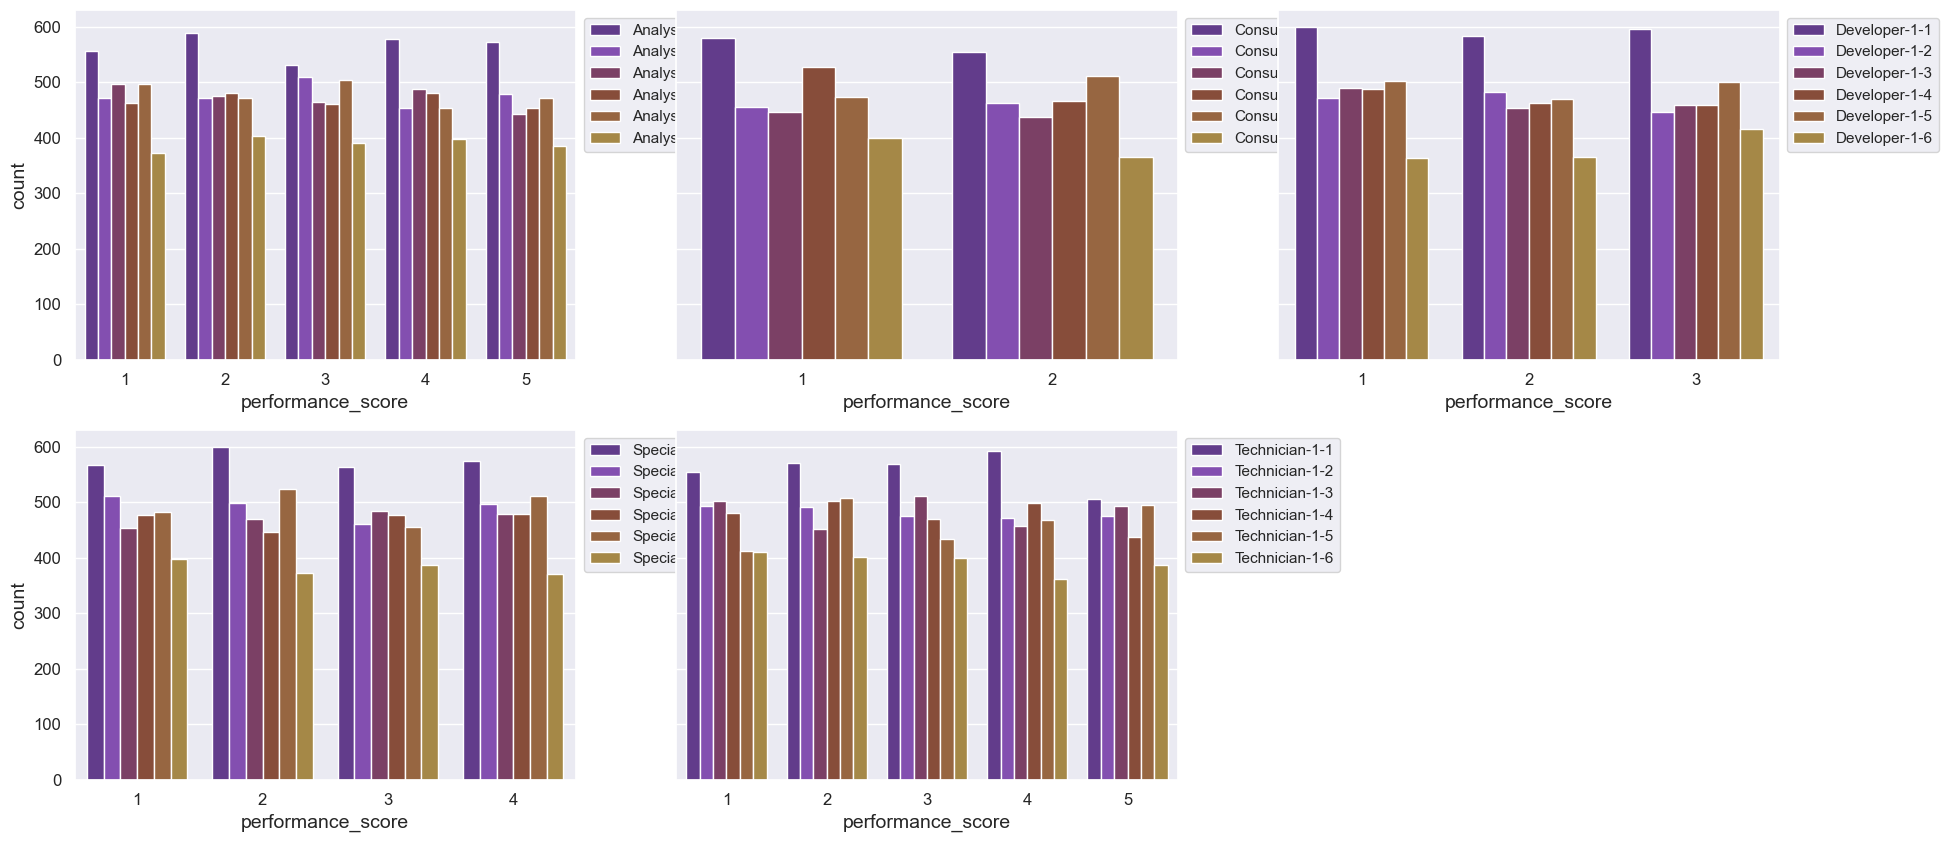

In [208]:
dfma['overtime_hours_category'] = pd.cut(df['overtime_hours'],bins=[-1,5,10,15,20,25,31],labels=[1,2,3,4,5,6])
dfma['job_salary_overtime'] = dfma['job_per_salary'].astype(str) +'-'+ dfma['overtime_hours_category'].astype(str)
f,ax = plt.subplots(2,3,figsize=(22,10),sharey=True)
ax = ax.flatten()
for i,job_salary in enumerate(sorted(dfma['job_per_salary'].unique())):
    sns.countplot(dfma[dfma['job_per_salary']==job_salary].sort_values(by=['job_per_salary','overtime_hours_category']),x=pscore,hue='job_salary_overtime',palette='gnuplot',saturation=0.4,ax=ax[i])
    ax[i].legend(bbox_to_anchor=(1,1))
ax[5].set_visible(False)

Come conclusione, le relazioni più forti con il performance score sono i lavori svolti e i salari mensili combinati.

## Transformation

Si procede ad escludere l'attributo da prevedere.

In [4]:
data_tr = data.copy()
ydata = data_tr.loc[:,[pscore]]
data_tr.drop(columns=[pscore],inplace=True)
xdata = data_tr

In [32]:
ydata.head()

,performance_score
0,5
1,5
2,3
3,2
4,2


In [33]:
xdata.head()

,department,gender,age,job_title,years_at_company,education_level,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score,resigned
0,IT,Male,55,Specialist,2,High School,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,Finance,Male,29,Developer,0,High School,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,Finance,Male,55,Specialist,8,High School,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,Customer Support,Female,48,Analyst,7,Bachelor,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,Engineering,Female,36,Analyst,3,Bachelor,4800.0,38,11,29,13,100,15,9,1,1.25,False


### department, gender, remote_work_frequency, promotions, job_title

___OneHotEncoder___, restituendo la matrice densa piuttosto che sparsa date le poche categorie

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
onehot_features = ['department','gender','remote_work_frequency','promotions','job_title']
onehot_enc = OneHotEncoder(sparse_output=False)
pipe_onehot = Pipeline([
    ('pipe_onehot',onehot_enc)
])

### age, team_size, employee_satisfaction_score

___KBinsDiscretizer___, applicando per i bin generati _OneHotEncoder_

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

bins_features = ['age','team_size','employee_satisfaction_score']
bins_enc = KBinsDiscretizer(n_bins=5, encode='onehot-dense',strategy = 'uniform')
pipe_bins = Pipeline([
    ('bins_enc',bins_enc)
])

### years_at_company, work_hours_per_week, projects_handled, sick_days, training_hours

___MinMaxScaler___

In [7]:
from sklearn.preprocessing import MinMaxScaler

numerics = ['years_at_company','work_hours_per_week','projects_handled','sick_days','team_size','training_hours']

numerics_enc = MinMaxScaler() #range (0,1)
pipe_numerics= Pipeline([
    ('numerics_enc',numerics_enc)
])

### education_level

___OrdinalEncoder___

In [130]:
data['education_level'].unique()

array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

educ_enc = OrdinalEncoder(categories=[list(data['education_level'].unique())])
pipe_educ= Pipeline([
    ('educ_enc',educ_enc)
])

### monthly_salary

___StandardScaler___, essendo l'attributo finora più importante nella predizione del performance score e avendo una distrubuzione normale.

In [9]:
from sklearn.preprocessing import StandardScaler

salary_scaler = StandardScaler()
pipe_salary = Pipeline([
    ('salary_scaler',salary_scaler)
])

### overtime_hours

___PowerTransformer___

In [10]:
from sklearn.preprocessing import PowerTransformer

overtime_transf = PowerTransformer(method='yeo-johnson') #for zeros values
pipe_overtime = Pipeline([
    ('overtime_transf',overtime_transf)
])

### resigned

___BinaryEncoding___

In [11]:
from sklearn.preprocessing import FunctionTransformer

pipe_resigned = Pipeline([
    ('resigned_enc',FunctionTransformer(lambda x: x.astype(int))) #binary encoding
])

### job_title & monthly_salary

come visto nella visualizzazione, c'è una buona correlazione tra la combo job_title-monthly_salary e il punteggio di performance.  
Si crea, così, una nuova feature, così che gli algoritmi di ML possano considerare la relazione esplicitamente.

In [12]:
from sklearn.compose import ColumnTransformer

def category_combine(X):
    x = X.copy()
    x['monthly_salary_category'] = pd.cut(
        x['monthly_salary'],
        bins=[3849.0, 6600.0, 7200.0, 7800.0, 8400.0, 9001.0],
        labels=[1, 2, 3, 4, 5]
    )
    x['job_salary'] = x['job_title'].astype(str) + '-' + x['monthly_salary_category'].astype(str)
    encoder =  OneHotEncoder(sparse_output=False)
    onehotencoded = encoder.fit_transform(x[['job_salary','monthly_salary_category']])
    x = x.drop(columns=['job_title','monthly_salary','job_salary','monthly_salary_category'])
    x = pd.concat([x,pd.DataFrame(onehotencoded)],axis=1)
    return x

pipe_combo = Pipeline([
    ('category_combine', FunctionTransformer(category_combine, validate=False))
])


Ora si crea un unico __ColumnTransformer__ per raggruppare ed applicare tutte le pipeline.

In [13]:
from sklearn.compose import ColumnTransformer
pipeline = ColumnTransformer([
    ('pipe_onehot', pipe_onehot, onehot_features),
    ('pipe_bins',pipe_bins,bins_features),
    ('pipe_numerics', pipe_numerics, numerics),
    ('pipe_educ', pipe_educ, ['education_level']),
    ('pipe_salary', pipe_salary, ['monthly_salary']),
    ('pipe_overtime', pipe_overtime, ['overtime_hours']),
    ('pipe_resigned', pipe_resigned, ['resigned']),
    ('pipe_combo', pipe_combo, ['job_title','monthly_salary'])
])
X = pipeline.fit_transform(xdata)
Y = ydata.values.reshape(-1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\francesco.frattolill\AppData\Local\Temp\ipykernel_13728\1664023790.py:14: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat([x,pd.DataFrame(onehotencoded)],axis=1)


## Applicazione di Algoritmi di ML

Conclusa la fase di Trasformazione delle feature del dataset, ora si può proseguire alla fase successiva: __applicazione degli algoritmi di machine learning al dataset__.

#### Train-set e Test set

Con gli strumenti offerti dalla libreria di _sklearn_, possiamo ottenere dei subset per fare training e testing di ogni modello che andremo ad applicare.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X,Y, test_size=0.2)

#### Setup

Le metriche utilizzate per valutare i nostri modelli sono:  
- ___Accuratezza Bilanciata___
- ___F1score___: la media armonica tra precision e recall  
- ___Matthews correlation coefficient___

In [79]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

metrics = [
    'balanced_accuracy',
    'f1_macro', # mean of F1 score over all equal class
    'f1_micro',
    'matthews_corrcoef', #[-1,1] -> +1 good prediction, 0 average, -1 inverse prediction
    #'cohen_kappa' [0,1] -> 0 is good prediction
]

cols = ['name'] + metrics
models = []
names = []

# Save paths
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
RESULTS_PATH = os.path.join(PROJECT_ROOT_DIR, "results")
if not os.path.exists(MODELS_PATH):
    os.makedirs(MODELS_PATH)
if not os.path.exists(RESULTS_PATH):
    os.makedirs(RESULTS_PATH)

results_file = os.path.join(RESULTS_PATH,'results.csv')

# For calculate the metrics values
def get_metrics(model, name, X, y):
    if(os.path.isfile(results_file)):
        x = pd.read_csv(results_file, names=cols)
        if(x['name']==name).any():
            return x[x['name']==name]
    #init
    elem = pd.DataFrame(index=[0], columns=cols)
    elem['name'] = name
    for m in metrics:
        print(m)
        elem[m] = abs(cross_val_score(model, X, y, n_jobs=-1, cv=10, scoring=m).mean())
        print(elem[m])
    save_results(elem,name)
    return elem

# Obtain the classifier from filesystem or creating it ex-novo, with GridSearchCV or not
def get_classifier(clf,name, models, names, grid=False, params={}):
    file = os.path.join(MODELS_PATH,name+'.sav')
    if os.path.isfile(file):
        x = pickle.load(open(file,'rb'))
        if(name not in names):
            names.append(name)
            models.append(x)
        else:
            if not grid and x.get_params()!=clf.get_params():
                x = clf
                models = [clf if clf.get_params()!=m.get_params() else m for m in models]
        return x, names, models
    else:
        if grid:
            clf_grid_search = GridSearchCV(clf, params, cv = 5, scoring = 'f1_macro', n_jobs = -1)
            clf_grid_search.fit(X_train, y_train)
            cls = clf_grid_search.best_estimator_
        else:
            cls = clf.fit(X_train,y_train)
        if(name not in names):
            names.append(name)
            models.append(cls)            
        pickle.dump(cls,open(file,'wb'))
        return cls, names, models

def save_results(r,name):
    if(os.path.isfile(results_file)):
        x = pd.read_csv(results_file, names=cols)
        if(x[x['name']==name].empty):
            r.to_csv(results_file, mode='a',header=False) #mode=append
        return
    r.to_csv(results_file, mode='a',header=False)

### Applicazione Algoritmi sul Train Set

#### Logistic Regression
Algoritmo che prende ispirazione, come suggerisce il nome, dal __Linear Regression__.  
Si preferisce la modalità one-vs-rest (di default), piuttosto che la multinomiale.

In [80]:
from sklearn.linear_model import LogisticRegression

model_name = 'logistic_regressor'

lr = LogisticRegression(max_iter=500) # C=1.0

lr_fitted,  names, models = get_classifier(lr,model_name,models,names)
r = get_metrics(lr_fitted,model_name,X_train,y_train)
r

balanced_accuracy
0    1.0
Name: balanced_accuracy, dtype: float64
f1_macro
0    1.0
Name: f1_macro, dtype: float64
f1_micro
0    1.0
Name: f1_micro, dtype: float64
matthews_corrcoef
0    1.0
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,logistic_regressor,1.0,1.0,1.0,1.0


Applico __GridSearch__ per hyperparameter tuning.

In [17]:
params = {'C': np.logspace(-3.0,3,num=7) }
model_name = 'logistic_regressor_grid_search'
best_lr,  names, models = get_classifier(lr,model_name,models,names, grid=True, params=params)
r = get_metrics(lr_fitted,model_name,X_train,y_train)
r

,name,balanced_accuracy,f1_macro,matthews_corrcoef
0,logistic_regressor_grid_search,1.0,1.0,1.0


#### Ridge Classifier
Converte l'output in range [-1,1], così da trattare il problema come uno di regressione.

In [81]:
from sklearn.linear_model import RidgeClassifier

model_name = 'ridge_classifier'

rc = RidgeClassifier(max_iter=500)

rc_fitted,  names, models = get_classifier(rc,model_name,models,names)
r = get_metrics(rc_fitted,model_name,X_train,y_train)
r

balanced_accuracy
0    0.765963
Name: balanced_accuracy, dtype: float64
f1_macro
0    0.755447
Name: f1_macro, dtype: float64
f1_micro
0    0.766525
Name: f1_micro, dtype: float64
matthews_corrcoef
0    0.720956
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,ridge_classifier,0.765963,0.755447,0.766525,0.720956


Applico __GridSearch__ per hyperparameter tuning.

In [19]:
params = {'alpha': np.logspace(-2.0,2,num=5) }
model_name = 'ridge_classifier_grid_search'
best_rc,  names, models = get_classifier(rc,model_name,models,names, grid=True, params=params)
r = get_metrics(best_rc,model_name,X_train,y_train)
r

,name,balanced_accuracy,f1_macro,matthews_corrcoef
0,ridge_classifier_grid_search,0.764332,0.752296,0.716435


#### SGDClassifier
Classificatori lineari (SVM, LogisticRegressor ecc.) che si addestrano attraverso la discesa del gradiente stocastica (SGD)

In [82]:
from sklearn.linear_model import SGDClassifier
model_name = 'SGD_classifier'
sgdc = SGDClassifier()
sgdc_fitted,  names, models = get_classifier(sgdc,model_name,models,names)
r = get_metrics(sgdc_fitted,model_name,X_train,y_train)
r

balanced_accuracy
0    0.85342
Name: balanced_accuracy, dtype: float64
f1_macro
0    0.842849
Name: f1_macro, dtype: float64
f1_micro
0    0.851575
Name: f1_micro, dtype: float64
matthews_corrcoef
0    0.803745
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,SGD_classifier,0.85342,0.842849,0.851575,0.803745


Applico __GridSearch__ per hyperparameter tuning.

In [23]:
params = {
    'loss': ['hinge', 'log_loss', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-2.0,2,num=5),
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'max_iter':[1000,2000]
}
model_name = 'SGD_classifier_grid_search'
best_sgdc,  names, models = get_classifier(sgdc,model_name,models,names, grid=True, params=params)
r = get_metrics(best_sgdc,model_name,X_train,y_train)
r

balanced_accuracy


KeyboardInterrupt: 

#### MLPClassifier
Rete a più livelli composta da percettroni, ovvero i primi modelli di rete neurale composti da:  
- Pesi
- Funzione di trasferimento
- Funzione di attivazione

In [83]:
from sklearn.neural_network import MLPClassifier
model_name = 'MLPClassifier'
mlpc = MLPClassifier()
mlpc_fitted, names, models = get_classifier(mlpc,model_name,models,names)
r = get_metrics(mlpc_fitted,model_name,X_train,y_train)
r

balanced_accuracy
0    1.0
Name: balanced_accuracy, dtype: float64
f1_macro
0    1.0
Name: f1_macro, dtype: float64
f1_micro
0    1.0
Name: f1_micro, dtype: float64
matthews_corrcoef
0    1.0
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,MLPClassifier,1.0,1.0,1.0,1.0


Applico __GridSearch__ per hyperparameter tuning, in particolare scegliendo 3 valori da attribuire al numero di neuroni per ogni livello:  
- n_input < n_neurons < n_output
- (2/3)*n_input + n_output
- n_neurons < 2*n_input

In [22]:
params = {
    'hidden_layer_sizes': [(64,20),(80,24),(182,75,22)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha': np.logspace(-1, 1, 3),
    'max_iter':[1000,2000]
}
model_name = 'MLPClassifier_grid_search'
best_mlpc, names, models = get_classifier(mlpc, model_name, models, names, grid=True, params=params)
r = get_metrics(best_mlpc,model_name,X_train,y_train)
r

KeyboardInterrupt: 

#### KNeighborsClassifier
Utilizza il voto dei k punti più vicini per poter indentificare la classe di appartenenza

In [84]:
from sklearn.neighbors import KNeighborsClassifier
model_name = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_jobs=-1)
knn_fitted, names, models = get_classifier(knn,model_name, models, names)
r = get_metrics(knn_fitted, model_name, X_train, y_train)
r

balanced_accuracy
0    0.660821
Name: balanced_accuracy, dtype: float64
f1_macro
0    0.664873
Name: f1_macro, dtype: float64
f1_micro
0    0.66085
Name: f1_micro, dtype: float64
matthews_corrcoef
0    0.576802
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,KNeighborsClassifier,0.660821,0.664873,0.66085,0.576802


Applico __GridSearch__ per hyperparameter tuning

In [70]:
params = {
    'n_neighbors':[5,10,20,30,40],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree','brute'],
    'metric':['euclidean','manhattan','minkowski']
}
model_name = 'KNeighborsClassifier_grid_search'
best_knn, names, models = get_classifier(knn, model_name, models, names, grid=True, params=params)
r = get_metrics(best_knn, model_name, X_train, y_train)
r

KeyboardInterrupt: 

#### DecisionTreeClassifier
Classificatore basato su albero decisionale

In [85]:
from sklearn.tree import DecisionTreeClassifier
model_name = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier()
dt_fitted, names, models = get_classifier(dt,model_name,models,names)
r = get_metrics(dt_fitted, model_name, X_train, y_train)
r

balanced_accuracy
0    1.0
Name: balanced_accuracy, dtype: float64
f1_macro
0    1.0
Name: f1_macro, dtype: float64
f1_micro
0    1.0
Name: f1_micro, dtype: float64
matthews_corrcoef
0    1.0
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,DecisionTreeClassifier,1.0,1.0,1.0,1.0


Applico __GridSearch__ per hyperparameter tuning

In [ ]:
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['random','best'],
    'max_depth':[None,5,10,20,30]
}
model_name = 'DecisionTreeClassifier_grid_search'
best_dt, names, models = get_classifier(dt,model_name,models,names,grid=True,params=params)
r = get_metrics(best_dt,model_name,X_train,y_train)
r

#### LinearSVC
Support Vector Classifier Lineare, preferibile al normale SVC dato il numero elevato di campioni

In [87]:
from sklearn.svm import LinearSVC
model_name = 'LinearSVC'
svc = LinearSVC()
svc_fitted, names, models = get_classifier(svc, model_name, models, names)
r = get_metrics(svc_fitted,model_name,X_train,y_train)
r

balanced_accuracy
0    0.924201
Name: balanced_accuracy, dtype: float64
f1_macro
0    0.92181
Name: f1_macro, dtype: float64
f1_micro
0    0.9242
Name: f1_micro, dtype: float64
matthews_corrcoef
0    0.906533
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,LinearSVC,0.924201,0.92181,0.9242,0.906533


Applico __GridSearch__ per hyperparameter tuning

In [ ]:
params = {
    'penalty':['l1','l2'],
    'loss':['hinge','squared_hinge'],
    'dual':[True,False],
    'multi_class':['ovr','crammer_singer'],
    'C':[1e-5,1e-4,1e-3]
}
model_name = 'LinearSVC_grid_search'
best_svc, names, models = get_classifier(svc,model_name,models,names,grid=True,params=params)
r = get_metrics(best_svc, model_name, X_train,y_train)
r

#### RandomForestClassifier
Insieme di decision tree

In [88]:
from sklearn.ensemble import RandomForestClassifier
model_name = 'RandomForestClassifier'
rfc = RandomForestClassifier(n_jobs=-1)
rfc_fitted, names, models = get_classifier(rfc,model_name,models,names)
r = get_metrics(rfc_fitted, model_name, X_train, y_train)
r

balanced_accuracy
0    1.0
Name: balanced_accuracy, dtype: float64
f1_macro
0    0.999963
Name: f1_macro, dtype: float64
f1_micro
0    0.999975
Name: f1_micro, dtype: float64
matthews_corrcoef
0    0.999953
Name: matthews_corrcoef, dtype: float64


,name,balanced_accuracy,f1_macro,f1_micro,matthews_corrcoef
0,RandomForestClassifier,1.0,0.999963,0.999975,0.999953


Applico __GridSearch__ per hyperparameter tuning

In [ ]:
params = {
    'n_estimators':[50,100,200,300],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[None,5,10,20,30],
    'max_features':['sqrt','log2',None]
}
model_name = 'RandomForestClassifier_grid_search'
best_rfc, names, models = get_classifier(rfc,model_name,models,names,grid=True,params=params)
r = get_metrics(best_rfc, model_name, X_train, y_train)
r

#### GradientBoostingClassifier
Utilizza modelli deboli, come alberi decisionali, insieme, come una pipeline

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_name='GradientBoostingClassifier'
gbc = GradientBoostingClassifier()
gbc_fitted, names, models = get_classifier(gbc,model_name,models,names)
r = get_metrics(gbc_fitted, model_name, X_train, y_train)
r

balanced_accuracy
0    1.0
Name: balanced_accuracy, dtype: float64
f1_macro


Applico __GridSearch__ per hyperparameter tuning

In [ ]:
params = {
    'loss':['log_loss','exponential'],
    'learning_rate':[0.1,0.7,0.4,1.0],
    'n_estimators':[50,100,150],
    'max_depth':[3,5,10]
}
model_name='GradientBoostingClassifier_grid_search'
best_gbc, names, models = get_classifier(gbc,model_name,models,names,grid=True, params=params)
r = get_metrics(best_gbc, model_name, X_train, y_train)
r

#### GaussianNB
Classificatore Naive Bayes, assumendo che la distribuzione delle probabilità di ogni feature sia normale (Gaussiana) 

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_name='GaussianNB'
g = GaussianNB()
g_fitted, names, models = get_classifier(g,model_name,models,names)
r = get_metrics(g_fitted, model_name, X_train, y_train)
r

In [34]:
# others classifiers

### Valutazione dei Modelli sul Training Set

Prendiamo i risultati ottenuti dal csv salvato

In [77]:
results = pd.read_csv(results_file, index_col=[1])
results.columns=cols
results

,name,balanced_accuracy,f1_macro,matthews_corrcoef
logistic_regressor,,,,
logistic_regressor_grid_search,0,1.000000,1.000000,1.000000
ridge_classifier,0,0.761905,0.749684,0.712275
ridge_classifier_grid_search,0,0.764332,0.752296,0.716435
SGD_classifier,0,0.852762,0.842161,0.815469
MLPClassifier,0,1.000000,1.000000,1.000000
KNeighborsClassifier,0,0.664057,0.668333,0.580451
DecisionTreeClassifier,0,1.000000,1.000000,1.000000
LinearSVC,0,0.924201,0.921810,0.906533
RandomForestClassifier,0,1.000000,0.999988,1.000000


### Applicazione dei Modelli sul Test Set

#### Setup

In [53]:
from sklearn.metrics import balanced_accuracy_score, f1_score, matthews_corrcoef

test_results_file = os.path.join(RESULTS_PATH,'test_results,csv')
cols = ['balanced_accuracy','f1_macro','f1_micro','matthews_corrcoef']

def get_test_metrics(models,names):
    test_results = pd.DataFrame()
    if os.path.isfile(test_results_file):
        test_results = pd.read_csv(test_results_file)
        test_results.columns=cols
    else:
        test_results = pd.DataFrame(index=names,columns=cols)
        for i, model in enumerate(models):
            model_name = names[i]
            y_pred = model.predict(X_test)
            test_results.loc[model_name,'balanced_accuracy'] = balanced_accuracy_score(y_test,y_pred)
            test_results.loc[model_name,'f1_macro'] = f1_score(y_test,y_pred,average='macro')
            test_results.loc[model_name,'f1_micro'] = f1_score(y_test,y_pred,average='micro')
            test_results.loc[model_name,'matthews_corrcoef'] = matthews_corrcoef(y_test,y_pred)
    return test_results
def save_test_results(r):
    if(os.path.isfile(test_results_file)):
        x = pd.read_csv(test_results_file, names=cols)
        if(x[x.loc['name']==name].empty):
            r.to_csv(test_results_file, mode='a',header=False) #mode=append
    else:
        r.to_csv(test_results_file, mode='a',header=False)

Calcoliamo i risultati dei modelli applicati sul test set

In [60]:
test_results = get_test_metrics(models,names).sort_values(by=['balanced_accuracy','f1_macro','matthews_corrcoef'], ascending=False)

In [66]:
test_results

,balanced_accuracy,f1_macro,matthews_corrcoef
logistic_regressor,1.0,1.0,1.0
logistic_regressor_grid_search,1.0,1.0,1.0
MLPClassifier,1.0,1.0,1.0
DecisionTreeClassifier,1.0,1.0,1.0
RandomForestClassifier,1.0,1.0,1.0
GradientBoostingClassifier,1.0,1.0,1.0
LinearSVC,0.923646,0.921158,0.905684
SGD_classifier,0.851977,0.85088,0.823962
ridge_classifier_grid_search,0.765783,0.753465,0.717154
ridge_classifier,0.764661,0.751635,0.714241


### Valutazione dei Modelli sul Test Set

#### Accuracy Bilanciata

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=test_results.index,y=test_results['balanced_accuracy'])
plt.xticks(rotation=90)
plt.title("Balance Accuracy Test Set")
plt.show()

#### f1_macro

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=test_results.index,y=test_results['f1_macro'])
plt.xticks(rotation=90)
plt.title("f1 macro Test Set")
plt.show()

#### f1_micro

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=test_results.index,y=test_results['f1_micro'])
plt.xticks(rotation=90)
plt.title("f1 micro Test Set")
plt.show()

#### Matthew's Correlation Coefficient

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=test_results.index,y=test_results['matthews_corrcoef'])
plt.xticks(rotation=90)
plt.title("Matthew's Correlation Coefficient Test Set")
plt.show()